In [6]:
import sys
sys.path.append('../')
from matplotlib import pyplot as plt

import os
import numpy as np
import matplotlib.pyplot as plt
#from score import get_nconts, get_inter_nconts, cbiplddt


In [7]:
pdb_txt = '''PARENT N/A
ATOM      1  N   GLY A   1      10.281 -11.683  11.125  1.00 76.68           N  
ATOM      2  CA  GLY A   1       8.965 -12.254  11.361  1.00 79.86           C  
ATOM      3  C   GLY A   1       7.895 -11.206  11.605  1.00 81.80           C  
ATOM      4  O   GLY A   1       6.778 -11.322  11.097  1.00 78.19           O  
ATOM      5  N   ASP A   2       8.117 -10.237  12.432  1.00 88.27           N  
ATOM      6  CA  ASP A   2       7.122  -9.229  12.787  1.00 89.35           C  
ATOM      7  C   ASP A   2       6.725  -8.398  11.569  1.00 89.73           C  
ATOM      8  CB  ASP A   2       7.654  -8.318  13.895  1.00 85.95           C  
ATOM      9  O   ASP A   2       5.567  -7.997  11.436  1.00 87.79           O  
ATOM     10  CG  ASP A   2       7.883  -9.050  15.206  1.00 76.29           C  
ATOM     11  OD1 ASP A   2       7.341 -10.161  15.386  1.00 68.37           O  
ATOM     12  OD2 ASP A   2       8.610  -8.508  16.067  1.00 72.65           O  
ATOM     13  N   GLU A   3       7.763  -8.165  10.722  1.00 91.23           N  
ATOM     14  CA  GLU A   3       7.439  -7.354   9.551  1.00 91.97           C  
ATOM     15  C   GLU A   3       6.478  -8.088   8.621  1.00 91.82           C  
ATOM     16  CB  GLU A   3       8.713  -6.970   8.795  1.00 89.86           C  
ATOM     17  O   GLU A   3       5.565  -7.480   8.058  1.00 90.80           O  
ATOM     18  CG  GLU A   3       9.594  -5.977   9.539  1.00 83.00           C  
ATOM     19  CD  GLU A   3      10.836  -5.575   8.760  1.00 80.26           C  
ATOM     20  OE1 GLU A   3      11.107  -6.178   7.696  1.00 79.28           O  
ATOM     21  OE2 GLU A   3      11.545  -4.650   9.217  1.00 78.67           O  
ATOM     22  N   LYS A   4       6.745  -9.337   8.440  1.00 91.86           N  
ATOM     23  CA  LYS A   4       5.837 -10.145   7.631  1.00 92.16           C  
ATOM     24  C   LYS A   4       4.431 -10.153   8.226  1.00 92.45           C  
ATOM     25  CB  LYS A   4       6.360 -11.576   7.504  1.00 89.62           C  
ATOM     26  O   LYS A   4       3.444 -10.006   7.502  1.00 91.67           O  
ATOM     27  CG  LYS A   4       5.528 -12.460   6.586  1.00 78.11           C  
ATOM     28  CD  LYS A   4       6.151 -13.841   6.424  1.00 73.82           C  
ATOM     29  CE  LYS A   4       5.300 -14.738   5.536  1.00 66.81           C  
ATOM     30  NZ  LYS A   4       5.915 -16.088   5.360  1.00 60.31           N  
ATOM     31  N   ASN A   5       4.348 -10.368   9.545  1.00 92.83           N  
ATOM     32  CA  ASN A   5       3.057 -10.343  10.223  1.00 93.25           C  
ATOM     33  C   ASN A   5       2.378  -8.983  10.088  1.00 93.57           C  
ATOM     34  CB  ASN A   5       3.218 -10.712  11.699  1.00 91.83           C  
ATOM     35  O   ASN A   5       1.159  -8.906   9.927  1.00 93.07           O  
ATOM     36  CG  ASN A   5       3.528 -12.181  11.904  1.00 83.42           C  
ATOM     37  ND2 ASN A   5       4.114 -12.510  13.049  1.00 76.31           N  
ATOM     38  OD1 ASN A   5       3.244 -13.015  11.039  1.00 75.54           O  
ATOM     39  N   PHE A   6       3.177  -7.970  10.179  1.00 94.38           N  
ATOM     40  CA  PHE A   6       2.637  -6.624  10.025  1.00 94.82           C  
ATOM     41  C   PHE A   6       2.108  -6.412   8.612  1.00 94.59           C  
ATOM     42  CB  PHE A   6       3.703  -5.574  10.350  1.00 94.46           C  
ATOM     43  O   PHE A   6       1.027  -5.848   8.425  1.00 94.02           O  
ATOM     44  CG  PHE A   6       3.206  -4.157  10.265  1.00 93.87           C  
ATOM     45  CD1 PHE A   6       2.222  -3.697  11.132  1.00 92.20           C  
ATOM     46  CD2 PHE A   6       3.722  -3.283   9.317  1.00 92.08           C  
ATOM     47  CE1 PHE A   6       1.759  -2.386  11.056  1.00 92.01           C  
ATOM     48  CE2 PHE A   6       3.265  -1.971   9.235  1.00 92.16           C  
ATOM     49  CZ  PHE A   6       2.283  -1.524  10.104  1.00 91.31           C  
ATOM     50  N   SER A   7       2.879  -6.875   7.653  1.00 94.38           N  
ATOM     51  CA  SER A   7       2.440  -6.777   6.264  1.00 94.33           C  
ATOM     52  C   SER A   7       1.099  -7.475   6.058  1.00 93.84           C  
ATOM     53  CB  SER A   7       3.487  -7.381   5.327  1.00 92.78           C  
ATOM     54  O   SER A   7       0.218  -6.948   5.375  1.00 92.70           O  
ATOM     55  OG  SER A   7       3.044  -7.335   3.982  1.00 73.93           O  
ATOM     56  N   LEU A   8       0.898  -8.582   6.655  1.00 93.32           N  
ATOM     57  CA  LEU A   8      -0.346  -9.335   6.543  1.00 93.30           C  
ATOM     58  C   LEU A   8      -1.500  -8.577   7.189  1.00 93.21           C  
ATOM     59  CB  LEU A   8      -0.198 -10.714   7.192  1.00 91.73           C  
ATOM     60  O   LEU A   8      -2.637  -8.648   6.717  1.00 92.35           O  
ATOM     61  CG  LEU A   8       0.704 -11.712   6.466  1.00 83.31           C  
ATOM     62  CD1 LEU A   8       0.898 -12.965   7.313  1.00 73.87           C  
ATOM     63  CD2 LEU A   8       0.120 -12.067   5.103  1.00 73.45           C  
ATOM     64  N   LEU A   9      -1.180  -7.894   8.200  1.00 94.13           N  
ATOM     65  CA  LEU A   9      -2.184  -7.127   8.928  1.00 94.24           C  
ATOM     66  C   LEU A   9      -2.697  -5.965   8.085  1.00 94.02           C  
ATOM     67  CB  LEU A   9      -1.605  -6.601  10.245  1.00 93.38           C  
ATOM     68  O   LEU A   9      -3.905  -5.727   8.018  1.00 93.20           O  
ATOM     69  CG  LEU A   9      -2.511  -5.680  11.063  1.00 89.12           C  
ATOM     70  CD1 LEU A   9      -3.703  -6.458  11.610  1.00 81.89           C  
ATOM     71  CD2 LEU A   9      -1.727  -5.027  12.197  1.00 81.77           C  
ATOM     72  N   VAL A  10      -1.860  -5.292   7.350  1.00 94.67           N  
ATOM     73  CA  VAL A  10      -2.253  -4.020   6.752  1.00 94.75           C  
ATOM     74  C   VAL A  10      -2.553  -4.217   5.268  1.00 94.40           C  
ATOM     75  CB  VAL A  10      -1.160  -2.944   6.937  1.00 93.91           C  
ATOM     76  O   VAL A  10      -3.140  -3.343   4.626  1.00 93.42           O  
ATOM     77  CG1 VAL A  10      -1.015  -2.569   8.411  1.00 87.70           C  
ATOM     78  CG2 VAL A  10       0.172  -3.435   6.374  1.00 87.02           C  
ATOM     79  N   SER A  11      -2.154  -5.345   4.703  1.00 93.35           N  
ATOM     80  CA  SER A  11      -2.317  -5.604   3.277  1.00 93.33           C  
ATOM     81  C   SER A  11      -3.773  -5.451   2.850  1.00 92.95           C  
ATOM     82  CB  SER A  11      -1.819  -7.007   2.926  1.00 91.90           C  
ATOM     83  O   SER A  11      -4.060  -4.884   1.794  1.00 91.78           O  
ATOM     84  OG  SER A  11      -2.617  -7.996   3.554  1.00 75.20           O  
ATOM     85  N   PRO A  12      -4.755  -5.949   3.674  1.00 91.69           N  
ATOM     86  CA  PRO A  12      -6.146  -5.805   3.237  1.00 91.89           C  
ATOM     87  C   PRO A  12      -6.565  -4.345   3.075  1.00 91.51           C  
ATOM     88  CB  PRO A  12      -6.940  -6.480   4.358  1.00 91.03           C  
ATOM     89  O   PRO A  12      -7.556  -4.055   2.400  1.00 90.52           O  
ATOM     90  CG  PRO A  12      -5.986  -7.456   4.967  1.00 89.61           C  
ATOM     91  CD  PRO A  12      -4.606  -6.866   4.922  1.00 88.75           C  
ATOM     92  N   TRP A  13      -5.856  -3.381   3.562  1.00 90.31           N  
ATOM     93  CA  TRP A  13      -6.231  -1.971   3.583  1.00 90.85           C  
ATOM     94  C   TRP A  13      -5.448  -1.183   2.537  1.00 90.12           C  
ATOM     95  CB  TRP A  13      -5.995  -1.372   4.973  1.00 89.23           C  
ATOM     96  O   TRP A  13      -5.535   0.046   2.483  1.00 88.10           O  
ATOM     97  CG  TRP A  13      -6.821  -2.001   6.054  1.00 83.21           C  
ATOM     98  CD1 TRP A  13      -8.080  -2.520   5.934  1.00 75.77           C  
ATOM     99  CD2 TRP A  13      -6.446  -2.173   7.424  1.00 77.51           C  
ATOM    100  CE2 TRP A  13      -7.527  -2.805   8.078  1.00 81.79           C  
ATOM    101  CE3 TRP A  13      -5.299  -1.854   8.164  1.00 84.66           C  
ATOM    102  NE1 TRP A  13      -8.510  -3.005   7.147  1.00 85.71           N  
ATOM    103  CH2 TRP A  13      -6.360  -2.801  10.137  1.00 80.61           C  
ATOM    104  CZ2 TRP A  13      -7.494  -3.124   9.437  1.00 83.12           C  
ATOM    105  CZ3 TRP A  13      -5.268  -2.173   9.516  1.00 81.95           C  
ATOM    106  N   PHE A  14      -4.706  -1.802   1.715  1.00 89.49           N  
ATOM    107  CA  PHE A  14      -3.755  -1.201   0.788  1.00 89.54           C  
ATOM    108  C   PHE A  14      -4.414  -0.091  -0.021  1.00 88.78           C  
ATOM    109  CB  PHE A  14      -3.176  -2.263  -0.153  1.00 89.26           C  
ATOM    110  O   PHE A  14      -3.853   0.997  -0.165  1.00 87.37           O  
ATOM    111  CG  PHE A  14      -2.223  -1.710  -1.178  1.00 89.66           C  
ATOM    112  CD1 PHE A  14      -0.913  -1.398  -0.833  1.00 88.50           C  
ATOM    113  CD2 PHE A  14      -2.637  -1.504  -2.487  1.00 88.49           C  
ATOM    114  CE1 PHE A  14      -0.029  -0.887  -1.780  1.00 88.19           C  
ATOM    115  CE2 PHE A  14      -1.759  -0.993  -3.439  1.00 88.27           C  
ATOM    116  CZ  PHE A  14      -0.456  -0.684  -3.083  1.00 88.36           C  
ATOM    117  N   ASP A  15      -5.593  -0.394  -0.472  1.00 85.40           N  
ATOM    118  CA  ASP A  15      -6.315   0.595  -1.267  1.00 84.95           C  
ATOM    119  C   ASP A  15      -7.704   0.855  -0.689  1.00 84.38           C  
ATOM    120  CB  ASP A  15      -6.427   0.137  -2.722  1.00 83.67           C  
ATOM    121  O   ASP A  15      -8.573   1.403  -1.371  1.00 82.07           O  
ATOM    122  CG  ASP A  15      -7.111  -1.211  -2.868  1.00 81.43           C  
ATOM    123  OD1 ASP A  15      -7.143  -1.988  -1.889  1.00 79.18           O  
ATOM    124  OD2 ASP A  15      -7.619  -1.501  -3.972  1.00 79.67           O  
ATOM    125  N   GLU A  16      -7.969   0.444   0.569  1.00 85.90           N  
ATOM    126  CA  GLU A  16      -9.299   0.461   1.171  1.00 85.41           C  
ATOM    127  C   GLU A  16      -9.390   1.506   2.279  1.00 85.46           C  
ATOM    128  CB  GLU A  16      -9.658  -0.922   1.721  1.00 83.59           C  
ATOM    129  O   GLU A  16     -10.410   2.184   2.418  1.00 83.98           O  
ATOM    130  CG  GLU A  16     -11.056  -1.003   2.316  1.00 76.45           C  
ATOM    131  CD  GLU A  16     -12.158  -0.888   1.276  1.00 72.91           C  
ATOM    132  OE1 GLU A  16     -11.849  -0.880   0.062  1.00 69.30           O  
ATOM    133  OE2 GLU A  16     -13.341  -0.805   1.677  1.00 65.96           O  
ATOM    134  N   LYS A  17      -8.380   1.650   3.049  1.00 87.16           N  
ATOM    135  CA  LYS A  17      -8.378   2.547   4.201  1.00 87.34           C  
ATOM    136  C   LYS A  17      -7.202   3.518   4.140  1.00 87.56           C  
ATOM    137  CB  LYS A  17      -8.331   1.748   5.504  1.00 86.24           C  
ATOM    138  O   LYS A  17      -6.104   3.144   3.723  1.00 86.91           O  
ATOM    139  CG  LYS A  17      -9.579   0.917   5.766  1.00 83.47           C  
ATOM    140  CD  LYS A  17      -9.516   0.227   7.122  1.00 81.88           C  
ATOM    141  CE  LYS A  17     -10.780  -0.576   7.401  1.00 76.96           C  
ATOM    142  NZ  LYS A  17     -10.732  -1.236   8.740  1.00 74.37           N  
ATOM    143  N   PRO A  18      -7.497   4.800   4.587  1.00 87.59           N  
ATOM    144  CA  PRO A  18      -6.393   5.761   4.642  1.00 88.07           C  
ATOM    145  C   PRO A  18      -5.467   5.528   5.835  1.00 88.58           C  
ATOM    146  CB  PRO A  18      -7.105   7.111   4.760  1.00 86.97           C  
ATOM    147  O   PRO A  18      -5.863   4.888   6.812  1.00 88.24           O  
ATOM    148  CG  PRO A  18      -8.383   6.807   5.473  1.00 85.12           C  
ATOM    149  CD  PRO A  18      -8.854   5.445   5.049  1.00 84.38           C  
ATOM    150  N   LEU A  19      -4.294   6.112   5.734  1.00 92.26           N  
ATOM    151  CA  LEU A  19      -3.286   5.934   6.774  1.00 92.43           C  
ATOM    152  C   LEU A  19      -3.801   6.432   8.121  1.00 92.25           C  
ATOM    153  CB  LEU A  19      -1.997   6.672   6.402  1.00 91.21           C  
ATOM    154  O   LEU A  19      -3.430   5.896   9.168  1.00 91.29           O  
ATOM    155  CG  LEU A  19      -0.910   5.837   5.725  1.00 85.91           C  
ATOM    156  CD1 LEU A  19      -1.382   5.362   4.355  1.00 77.76           C  
ATOM    157  CD2 LEU A  19       0.382   6.639   5.603  1.00 77.87           C  
ATOM    158  N   MET A  20      -4.665   7.462   8.134  1.00 92.13           N  
ATOM    159  CA  MET A  20      -5.174   8.019   9.384  1.00 91.97           C  
ATOM    160  C   MET A  20      -6.019   6.993  10.132  1.00 91.48           C  
ATOM    161  CB  MET A  20      -5.997   9.280   9.117  1.00 90.22           C  
ATOM    162  O   MET A  20      -6.168   7.077  11.352  1.00 89.92           O  
ATOM    163  CG  MET A  20      -7.255   9.029   8.301  1.00 82.50           C  
ATOM    164  SD  MET A  20      -8.186  10.572   7.954  1.00 77.53           S  
ATOM    165  CE  MET A  20      -8.624  11.069   9.643  1.00 71.25           C  
ATOM    166  N   GLU A  21      -6.555   6.037   9.388  1.00 92.45           N  
ATOM    167  CA  GLU A  21      -7.270   4.940  10.035  1.00 92.31           C  
ATOM    168  C   GLU A  21      -6.336   3.770  10.328  1.00 92.26           C  
ATOM    169  CB  GLU A  21      -8.440   4.474   9.165  1.00 90.63           C  
ATOM    170  O   GLU A  21      -6.441   3.133  11.379  1.00 91.26           O  
ATOM    171  CG  GLU A  21      -9.579   5.479   9.076  1.00 82.11           C  
ATOM    172  CD  GLU A  21     -10.770   4.968   8.282  1.00 78.36           C  
ATOM    173  OE1 GLU A  21     -11.077   3.756   8.360  1.00 75.46           O  
ATOM    174  OE2 GLU A  21     -11.402   5.784   7.574  1.00 73.62           O  
ATOM    175  N   ILE A  22      -5.422   3.464   9.492  1.00 94.28           N  
ATOM    176  CA  ILE A  22      -4.494   2.343   9.599  1.00 94.38           C  
ATOM    177  C   ILE A  22      -3.551   2.563  10.779  1.00 94.14           C  
ATOM    178  CB  ILE A  22      -3.686   2.152   8.296  1.00 93.63           C  
ATOM    179  O   ILE A  22      -3.097   1.604  11.407  1.00 93.39           O  
ATOM    180  CG1 ILE A  22      -4.620   1.780   7.138  1.00 88.33           C  
ATOM    181  CG2 ILE A  22      -2.599   1.091   8.485  1.00 88.18           C  
ATOM    182  CD1 ILE A  22      -3.928   1.709   5.783  1.00 83.64           C  
ATOM    183  N   GLN A  23      -3.268   3.785  11.161  1.00 95.18           N  
ATOM    184  CA  GLN A  23      -2.261   4.104  12.168  1.00 95.19           C  
ATOM    185  C   GLN A  23      -2.629   3.504  13.522  1.00 94.81           C  
ATOM    186  CB  GLN A  23      -2.089   5.618  12.294  1.00 94.17           C  
ATOM    187  O   GLN A  23      -1.749   3.172  14.319  1.00 93.91           O  
ATOM    188  CG  GLN A  23      -3.268   6.319  12.954  1.00 88.19           C  
ATOM    189  CD  GLN A  23      -3.000   7.787  13.228  1.00 83.33           C  
ATOM    190  NE2 GLN A  23      -3.969   8.637  12.907  1.00 78.76           N  
ATOM    191  OE1 GLN A  23      -1.931   8.154  13.726  1.00 80.78           O  
ATOM    192  N   PHE A  24      -3.916   3.442  13.717  1.00 94.59           N  
ATOM    193  CA  PHE A  24      -4.329   2.927  15.017  1.00 94.61           C  
ATOM    194  C   PHE A  24      -3.967   1.453  15.155  1.00 94.46           C  
ATOM    195  CB  PHE A  24      -5.835   3.118  15.219  1.00 93.21           C  
ATOM    196  O   PHE A  24      -3.444   1.030  16.188  1.00 93.71           O  
ATOM    197  CG  PHE A  24      -6.257   4.560  15.311  1.00 85.15           C  
ATOM    198  CD1 PHE A  24      -5.973   5.310  16.445  1.00 75.58           C  
ATOM    199  CD2 PHE A  24      -6.938   5.165  14.262  1.00 75.52           C  
ATOM    200  CE1 PHE A  24      -6.363   6.645  16.533  1.00 75.27           C  
ATOM    201  CE2 PHE A  24      -7.330   6.498  14.343  1.00 73.75           C  
ATOM    202  CZ  PHE A  24      -7.042   7.236  15.480  1.00 73.65           C  
ATOM    203  N   ALA A  25      -4.281   0.689  14.152  1.00 95.19           N  
ATOM    204  CA  ALA A  25      -3.899  -0.720  14.153  1.00 95.26           C  
ATOM    205  C   ALA A  25      -2.381  -0.877  14.124  1.00 95.27           C  
ATOM    206  CB  ALA A  25      -4.527  -1.443  12.964  1.00 94.29           C  
ATOM    207  O   ALA A  25      -1.834  -1.801  14.730  1.00 94.75           O  
ATOM    208  N   SER A  26      -1.684  -0.004  13.469  1.00 95.32           N  
ATOM    209  CA  SER A  26      -0.227  -0.025  13.392  1.00 95.43           C  
ATOM    210  C   SER A  26       0.402   0.233  14.757  1.00 95.19           C  
ATOM    211  CB  SER A  26       0.272   1.015  12.388  1.00 94.63           C  
ATOM    212  O   SER A  26       1.312  -0.487  15.173  1.00 94.53           O  
ATOM    213  OG  SER A  26      -0.151   0.689  11.075  1.00 76.95           O  
ATOM    214  N   LYS A  27      -0.100   1.235  15.346  1.00 94.15           N  
ATOM    215  CA  LYS A  27       0.402   1.550  16.681  1.00 94.03           C  
ATOM    216  C   LYS A  27       0.180   0.385  17.641  1.00 93.82           C  
ATOM    217  CB  LYS A  27      -0.272   2.811  17.223  1.00 92.54           C  
ATOM    218  O   LYS A  27       1.079   0.023  18.404  1.00 92.94           O  
ATOM    219  CG  LYS A  27       0.299   3.297  18.548  1.00 82.93           C  
ATOM    220  CD  LYS A  27      -0.307   4.632  18.961  1.00 78.45           C  
ATOM    221  CE  LYS A  27       0.271   5.124  20.281  1.00 70.69           C  
ATOM    222  NZ  LYS A  27      -0.308   6.441  20.683  1.00 62.73           N  
ATOM    223  N   ARG A  28      -1.009  -0.154  17.601  1.00 94.37           N  
ATOM    224  CA  ARG A  28      -1.322  -1.293  18.458  1.00 94.23           C  
ATOM    225  C   ARG A  28      -0.401  -2.471  18.161  1.00 94.14           C  
ATOM    226  CB  ARG A  28      -2.783  -1.713  18.282  1.00 92.52           C  
ATOM    227  O   ARG A  28       0.084  -3.134  19.081  1.00 93.25           O  
ATOM    228  CG  ARG A  28      -3.212  -2.848  19.198  1.00 79.76           C  
ATOM    229  CD  ARG A  28      -4.719  -3.060  19.166  1.00 74.09           C  
ATOM    230  NE  ARG A  28      -5.136  -4.113  20.088  1.00 70.24           N  
ATOM    231  NH1 ARG A  28      -7.398  -3.839  19.706  1.00 54.24           N  
ATOM    232  NH2 ARG A  28      -6.664  -5.432  21.182  1.00 48.71           N  
ATOM    233  CZ  ARG A  28      -6.398  -4.459  20.323  1.00 66.58           C  
ATOM    234  N   PHE A  29      -0.170  -2.705  16.943  1.00 93.97           N  
ATOM    235  CA  PHE A  29       0.721  -3.785  16.536  1.00 94.16           C  
ATOM    236  C   PHE A  29       2.117  -3.582  17.113  1.00 93.84           C  
ATOM    237  CB  PHE A  29       0.792  -3.879  15.009  1.00 93.78           C  
ATOM    238  O   PHE A  29       2.725  -4.522  17.628  1.00 93.07           O  
ATOM    239  CG  PHE A  29       1.657  -5.005  14.510  1.00 92.82           C  
ATOM    240  CD1 PHE A  29       1.106  -6.247  14.220  1.00 90.48           C  
ATOM    241  CD2 PHE A  29       3.022  -4.821  14.330  1.00 90.27           C  
ATOM    242  CE1 PHE A  29       1.904  -7.291  13.757  1.00 90.49           C  
ATOM    243  CE2 PHE A  29       3.826  -5.859  13.869  1.00 90.70           C  
ATOM    244  CZ  PHE A  29       3.265  -7.094  13.584  1.00 89.60           C  
ATOM    245  N   PHE A  30       2.611  -2.394  16.973  1.00 93.06           N  
ATOM    246  CA  PHE A  30       3.952  -2.100  17.465  1.00 93.06           C  
ATOM    247  C   PHE A  30       4.037  -2.322  18.970  1.00 92.58           C  
ATOM    248  CB  PHE A  30       4.347  -0.660  17.124  1.00 92.44           C  
ATOM    249  O   PHE A  30       4.990  -2.930  19.461  1.00 91.53           O  
ATOM    250  CG  PHE A  30       5.747  -0.299  17.544  1.00 90.83           C  
ATOM    251  CD1 PHE A  30       6.839  -0.685  16.778  1.00 87.67           C  
ATOM    252  CD2 PHE A  30       5.969   0.428  18.707  1.00 87.44           C  
ATOM    253  CE1 PHE A  30       8.135  -0.352  17.164  1.00 87.73           C  
ATOM    254  CE2 PHE A  30       7.262   0.764  19.100  1.00 88.19           C  
ATOM    255  CZ  PHE A  30       8.343   0.372  18.327  1.00 86.22           C  
ATOM    256  N   ILE A  31       3.079  -1.912  19.705  1.00 92.35           N  
ATOM    257  CA  ILE A  31       3.059  -2.034  21.158  1.00 92.18           C  
ATOM    258  C   ILE A  31       2.970  -3.507  21.551  1.00 91.89           C  
ATOM    259  CB  ILE A  31       1.884  -1.243  21.776  1.00 91.22           C  
ATOM    260  O   ILE A  31       3.700  -3.966  22.433  1.00 90.88           O  
ATOM    261  CG1 ILE A  31       2.121   0.264  21.631  1.00 85.52           C  
ATOM    262  CG2 ILE A  31       1.688  -1.628  23.245  1.00 84.62           C  
ATOM    263  CD1 ILE A  31       0.902   1.116  21.959  1.00 81.21           C  
ATOM    264  N   ASP A  32       2.138  -4.271  20.841  1.00 91.86           N  
ATOM    265  CA  ASP A  32       1.841  -5.646  21.229  1.00 91.55           C  
ATOM    266  C   ASP A  32       2.971  -6.588  20.819  1.00 90.89           C  
ATOM    267  CB  ASP A  32       0.521  -6.106  20.607  1.00 90.57           C  
ATOM    268  O   ASP A  32       3.234  -7.583  21.498  1.00 89.37           O  
ATOM    269  CG  ASP A  32      -0.693  -5.439  21.230  1.00 86.63           C  
ATOM    270  OD1 ASP A  32      -0.575  -4.871  22.337  1.00 82.52           O  
ATOM    271  OD2 ASP A  32      -1.777  -5.485  20.610  1.00 83.86           O  
ATOM    272  N   HIS A  33       3.714  -6.245  19.734  1.00 90.91           N  
ATOM    273  CA  HIS A  33       4.550  -7.295  19.162  1.00 91.01           C  
ATOM    274  C   HIS A  33       5.997  -6.834  19.027  1.00 90.17           C  
ATOM    275  CB  HIS A  33       4.007  -7.727  17.798  1.00 90.02           C  
ATOM    276  O   HIS A  33       6.886  -7.642  18.748  1.00 88.34           O  
ATOM    277  CG  HIS A  33       2.650  -8.352  17.864  1.00 87.31           C  
ATOM    278  CD2 HIS A  33       1.441  -7.896  17.458  1.00 82.98           C  
ATOM    279  ND1 HIS A  33       2.430  -9.601  18.404  1.00 83.28           N  
ATOM    280  CE1 HIS A  33       1.141  -9.887  18.327  1.00 84.03           C  
ATOM    281  NE2 HIS A  33       0.519  -8.869  17.757  1.00 83.43           N  
ATOM    282  N   VAL A  34       6.286  -5.561  19.218  1.00 91.75           N  
ATOM    283  CA  VAL A  34       7.616  -5.096  18.837  1.00 91.70           C  
ATOM    284  C   VAL A  34       8.268  -4.374  20.013  1.00 91.04           C  
ATOM    285  CB  VAL A  34       7.560  -4.166  17.604  1.00 90.80           C  
ATOM    286  O   VAL A  34       9.447  -4.587  20.304  1.00 89.26           O  
ATOM    287  CG1 VAL A  34       8.959  -3.677  17.233  1.00 87.75           C  
ATOM    288  CG2 VAL A  34       6.910  -4.884  16.423  1.00 87.03           C  
ATOM    289  N   SER A  35       7.594  -3.552  20.712  1.00 90.12           N  
ATOM    290  CA  SER A  35       8.132  -2.566  21.643  1.00 89.91           C  
ATOM    291  C   SER A  35       8.849  -3.238  22.808  1.00 88.91           C  
ATOM    292  CB  SER A  35       7.016  -1.664  22.172  1.00 88.57           C  
ATOM    293  O   SER A  35       9.696  -2.625  23.461  1.00 86.57           O  
ATOM    294  OG  SER A  35       6.070  -2.416  22.913  1.00 84.22           O  
ATOM    295  N   HIS A  36       8.537  -4.409  23.174  1.00 87.84           N  
ATOM    296  CA  HIS A  36       9.064  -5.068  24.364  1.00 87.97           C  
ATOM    297  C   HIS A  36      10.370  -5.794  24.060  1.00 86.76           C  
ATOM    298  CB  HIS A  36       8.037  -6.050  24.932  1.00 84.89           C  
ATOM    299  O   HIS A  36      10.962  -6.412  24.947  1.00 83.79           O  
ATOM    300  CG  HIS A  36       6.680  -5.452  25.129  1.00 75.95           C  
ATOM    301  CD2 HIS A  36       5.492  -5.729  24.542  1.00 68.94           C  
ATOM    302  ND1 HIS A  36       6.440  -4.433  26.025  1.00 66.59           N  
ATOM    303  CE1 HIS A  36       5.158  -4.109  25.981  1.00 67.16           C  
ATOM    304  NE2 HIS A  36       4.561  -4.881  25.089  1.00 64.46           N  
ATOM    305  N   ARG A  37      10.878  -5.659  22.960  1.00 87.70           N  
ATOM    306  CA  ARG A  37      12.073  -6.392  22.552  1.00 87.82           C  
ATOM    307  C   ARG A  37      13.326  -5.783  23.172  1.00 88.28           C  
ATOM    308  CB  ARG A  37      12.198  -6.411  21.027  1.00 85.44           C  
ATOM    309  O   ARG A  37      13.386  -4.573  23.402  1.00 87.50           O  
ATOM    310  CG  ARG A  37      11.123  -7.231  20.332  1.00 77.54           C  
ATOM    311  CD  ARG A  37      11.383  -7.348  18.836  1.00 74.57           C  
ATOM    312  NE  ARG A  37      10.363  -8.156  18.174  1.00 69.89           N  
ATOM    313  NH1 ARG A  37      11.364  -8.086  16.093  1.00 59.98           N  
ATOM    314  NH2 ARG A  37       9.398  -9.227  16.386  1.00 55.44           N  
ATOM    315  CZ  ARG A  37      10.378  -8.488  16.886  1.00 68.44           C  
ATOM    316  N   THR A  38      14.168  -6.592  23.370  1.00 88.63           N  
ATOM    317  CA  THR A  38      15.490  -6.205  23.850  1.00 89.14           C  
ATOM    318  C   THR A  38      16.579  -6.729  22.918  1.00 89.13           C  
ATOM    319  CB  THR A  38      15.740  -6.725  25.278  1.00 86.40           C  
ATOM    320  O   THR A  38      16.650  -7.930  22.651  1.00 87.42           O  
ATOM    321  CG2 THR A  38      17.044  -6.173  25.844  1.00 75.65           C  
ATOM    322  OG1 THR A  38      14.656  -6.320  26.124  1.00 81.38           O  
ATOM    323  N   PRO A  39      17.419  -5.951  22.331  1.00 87.11           N  
ATOM    324  CA  PRO A  39      17.430  -4.490  22.443  1.00 87.81           C  
ATOM    325  C   PRO A  39      16.222  -3.838  21.774  1.00 87.21           C  
ATOM    326  CB  PRO A  39      18.727  -4.093  21.735  1.00 85.28           C  
ATOM    327  O   PRO A  39      15.568  -4.459  20.933  1.00 84.75           O  
ATOM    328  CG  PRO A  39      18.960  -5.173  20.728  1.00 80.75           C  
ATOM    329  CD  PRO A  39      18.434  -6.464  21.284  1.00 78.72           C  
ATOM    330  N   PRO A  40      15.867  -2.755  22.265  1.00 87.39           N  
ATOM    331  CA  PRO A  40      14.693  -2.054  21.740  1.00 87.63           C  
ATOM    332  C   PRO A  40      14.777  -1.808  20.235  1.00 86.99           C  
ATOM    333  CB  PRO A  40      14.699  -0.731  22.510  1.00 85.54           C  
ATOM    334  O   PRO A  40      15.853  -1.502  19.714  1.00 84.72           O  
ATOM    335  CG  PRO A  40      15.493  -1.011  23.745  1.00 80.59           C  
ATOM    336  CD  PRO A  40      16.507  -2.073  23.429  1.00 77.59           C  
ATOM    337  N   VAL A  41      13.803  -2.145  19.563  1.00 87.74           N  
ATOM    338  CA  VAL A  41      13.689  -1.881  18.132  1.00 87.16           C  
ATOM    339  C   VAL A  41      13.424  -0.395  17.900  1.00 86.08           C  
ATOM    340  CB  VAL A  41      12.571  -2.729  17.485  1.00 85.48           C  
ATOM    341  O   VAL A  41      12.448   0.156  18.416  1.00 83.27           O  
ATOM    342  CG1 VAL A  41      12.402  -2.366  16.011  1.00 79.14           C  
ATOM    343  CG2 VAL A  41      12.874  -4.218  17.642  1.00 79.22           C  
ATOM    344  N   ARG A  42      14.314   0.241  17.168  1.00 83.06           N  
ATOM    345  CA  ARG A  42      14.243   1.685  16.967  1.00 82.66           C  
ATOM    346  C   ARG A  42      13.438   2.024  15.716  1.00 82.44           C  
ATOM    347  CB  ARG A  42      15.647   2.284  16.865  1.00 79.35           C  
ATOM    348  O   ARG A  42      12.911   3.132  15.593  1.00 79.46           O  
ATOM    349  CG  ARG A  42      16.450   2.195  18.153  1.00 72.80           C  
ATOM    350  CD  ARG A  42      17.767   2.952  18.050  1.00 70.38           C  
ATOM    351  NE  ARG A  42      18.532   2.872  19.291  1.00 61.38           N  
ATOM    352  NH1 ARG A  42      20.168   4.358  18.620  1.00 50.97           N  
ATOM    353  NH2 ARG A  42      20.271   3.396  20.698  1.00 46.66           N  
ATOM    354  CZ  ARG A  42      19.655   3.542  19.533  1.00 63.38           C  
ATOM    355  N   ARG A  43      13.374   1.055  14.816  1.00 88.74           N  
ATOM    356  CA  ARG A  43      12.657   1.304  13.570  1.00 88.79           C  
ATOM    357  C   ARG A  43      11.808   0.100  13.176  1.00 88.95           C  
ATOM    358  CB  ARG A  43      13.636   1.645  12.444  1.00 85.71           C  
ATOM    359  O   ARG A  43      12.295  -1.032  13.162  1.00 87.14           O  
ATOM    360  CG  ARG A  43      12.980   2.272  11.225  1.00 76.22           C  
ATOM    361  CD  ARG A  43      13.867   2.170   9.992  1.00 73.22           C  
ATOM    362  NE  ARG A  43      13.291   2.880   8.853  1.00 66.62           N  
ATOM    363  NH1 ARG A  43      13.675   1.181   7.335  1.00 53.49           N  
ATOM    364  NH2 ARG A  43      12.669   3.126   6.656  1.00 49.37           N  
ATOM    365  CZ  ARG A  43      13.213   2.394   7.617  1.00 66.74           C  
ATOM    366  N   HIS A  44      10.562   0.413  12.817  1.00 93.49           N  
ATOM    367  CA  HIS A  44       9.631  -0.614  12.361  1.00 93.85           C  
ATOM    368  C   HIS A  44       8.568  -0.024  11.440  1.00 93.92           C  
ATOM    369  CB  HIS A  44       8.968  -1.303  13.555  1.00 93.28           C  
ATOM    370  O   HIS A  44       8.075   1.080  11.681  1.00 93.48           O  
ATOM    371  CG  HIS A  44       8.225  -2.549  13.191  1.00 91.50           C  
ATOM    372  CD2 HIS A  44       8.581  -3.853  13.273  1.00 88.02           C  
ATOM    373  ND1 HIS A  44       6.950  -2.529  12.669  1.00 88.06           N  
ATOM    374  CE1 HIS A  44       6.553  -3.771  12.445  1.00 88.06           C  
ATOM    375  NE2 HIS A  44       7.524  -4.593  12.803  1.00 88.41           N  
ATOM    376  N   PRO A  45       8.228  -0.785  10.414  1.00 94.22           N  
ATOM    377  CA  PRO A  45       7.241  -0.251   9.473  1.00 94.60           C  
ATOM    378  C   PRO A  45       5.946   0.179  10.157  1.00 94.74           C  
ATOM    379  CB  PRO A  45       6.992  -1.424   8.520  1.00 93.73           C  
ATOM    380  O   PRO A  45       5.265   1.091   9.681  1.00 94.42           O  
ATOM    381  CG  PRO A  45       8.253  -2.225   8.564  1.00 90.63           C  
ATOM    382  CD  PRO A  45       8.849  -2.103   9.937  1.00 88.44           C  
ATOM    383  N   ALA A  46       5.569  -0.434  11.227  1.00 94.32           N  
ATOM    384  CA  ALA A  46       4.373  -0.035  11.965  1.00 94.46           C  
ATOM    385  C   ALA A  46       4.503   1.393  12.488  1.00 94.26           C  
ATOM    386  CB  ALA A  46       4.115  -0.999  13.120  1.00 93.72           C  
ATOM    387  O   ALA A  46       3.543   2.166  12.443  1.00 93.63           O  
ATOM    388  N   LEU A  47       5.673   1.721  12.955  1.00 93.64           N  
ATOM    389  CA  LEU A  47       5.908   3.076  13.440  1.00 93.62           C  
ATOM    390  C   LEU A  47       6.005   4.061  12.280  1.00 93.86           C  
ATOM    391  CB  LEU A  47       7.188   3.131  14.279  1.00 91.95           C  
ATOM    392  O   LEU A  47       5.617   5.224  12.413  1.00 93.29           O  
ATOM    393  CG  LEU A  47       7.099   2.550  15.691  1.00 80.58           C  
ATOM    394  CD1 LEU A  47       8.456   2.627  16.383  1.00 68.37           C  
ATOM    395  CD2 LEU A  47       6.037   3.282  16.504  1.00 67.84           C  
ATOM    396  N   ASP A  48       6.506   3.568  11.158  1.00 94.81           N  
ATOM    397  CA  ASP A  48       6.633   4.415   9.975  1.00 95.05           C  
ATOM    398  C   ASP A  48       5.266   4.907   9.503  1.00 95.16           C  
ATOM    399  CB  ASP A  48       7.339   3.660   8.847  1.00 94.51           C  
ATOM    400  O   ASP A  48       5.123   6.061   9.095  1.00 94.90           O  
ATOM    401  CG  ASP A  48       8.818   3.445   9.113  1.00 93.01           C  
ATOM    402  OD1 ASP A  48       9.381   4.113  10.007  1.00 90.56           O  
ATOM    403  OD2 ASP A  48       9.428   2.602   8.419  1.00 90.57           O  
ATOM    404  N   ILE A  49       4.257   4.056   9.623  1.00 95.42           N  
ATOM    405  CA  ILE A  49       2.907   4.447   9.234  1.00 95.45           C  
ATOM    406  C   ILE A  49       2.419   5.582  10.132  1.00 95.29           C  
ATOM    407  CB  ILE A  49       1.930   3.251   9.303  1.00 94.83           C  
ATOM    408  O   ILE A  49       1.829   6.552   9.651  1.00 94.77           O  
ATOM    409  CG1 ILE A  49       2.186   2.285   8.141  1.00 88.45           C  
ATOM    410  CG2 ILE A  49       0.478   3.739   9.300  1.00 88.27           C  
ATOM    411  CD1 ILE A  49       1.054   1.296   7.898  1.00 81.38           C  
ATOM    412  N   VAL A  50       2.682   5.472  11.379  1.00 94.86           N  
ATOM    413  CA  VAL A  50       2.257   6.481  12.343  1.00 94.85           C  
ATOM    414  C   VAL A  50       2.958   7.806  12.047  1.00 94.75           C  
ATOM    415  CB  VAL A  50       2.547   6.038  13.794  1.00 94.01           C  
ATOM    416  O   VAL A  50       2.318   8.860  12.016  1.00 94.19           O  
ATOM    417  CG1 VAL A  50       2.163   7.138  14.782  1.00 87.89           C  
ATOM    418  CG2 VAL A  50       1.801   4.743  14.115  1.00 87.84           C  
ATOM    419  N   LYS A  51       4.187   7.715  11.780  1.00 95.00           N  
ATOM    420  CA  LYS A  51       4.989   8.907  11.518  1.00 95.10           C  
ATOM    421  C   LYS A  51       4.614   9.539  10.181  1.00 95.18           C  
ATOM    422  CB  LYS A  51       6.480   8.567  11.537  1.00 94.27           C  
ATOM    423  O   LYS A  51       4.552  10.765  10.063  1.00 94.84           O  
ATOM    424  CG  LYS A  51       7.014   8.203  12.914  1.00 89.32           C  
ATOM    425  CD  LYS A  51       8.480   7.793  12.855  1.00 84.69           C  
ATOM    426  CE  LYS A  51       9.011   7.413  14.231  1.00 78.37           C  
ATOM    427  NZ  LYS A  51      10.429   6.946  14.167  1.00 68.86           N  
ATOM    428  N   LEU A  52       4.379   8.738   9.205  1.00 94.94           N  
ATOM    429  CA  LEU A  52       3.933   9.241   7.911  1.00 95.06           C  
ATOM    430  C   LEU A  52       2.609   9.987   8.045  1.00 94.81           C  
ATOM    431  CB  LEU A  52       3.786   8.092   6.910  1.00 94.73           C  
ATOM    432  O   LEU A  52       2.453  11.085   7.506  1.00 94.23           O  
ATOM    433  CG  LEU A  52       5.081   7.556   6.298  1.00 93.70           C  
ATOM    434  CD1 LEU A  52       4.818   6.246   5.563  1.00 91.24           C  
ATOM    435  CD2 LEU A  52       5.696   8.588   5.359  1.00 90.89           C  
ATOM    436  N   ASN A  53       1.728   9.344   8.789  1.00 94.06           N  
ATOM    437  CA  ASN A  53       0.433   9.997   8.952  1.00 93.91           C  
ATOM    438  C   ASN A  53       0.572  11.357   9.629  1.00 93.54           C  
ATOM    439  CB  ASN A  53      -0.522   9.103   9.747  1.00 92.81           C  
ATOM    440  O   ASN A  53      -0.106  12.315   9.252  1.00 92.53           O  
ATOM    441  CG  ASN A  53      -1.919   9.684   9.845  1.00 86.88           C  
ATOM    442  ND2 ASN A  53      -2.399   9.869  11.069  1.00 79.40           N  
ATOM    443  OD1 ASN A  53      -2.561   9.964   8.830  1.00 80.23           O  
ATOM    444  N   TYR A  54       1.419  11.402  10.560  1.00 94.52           N  
ATOM    445  CA  TYR A  54       1.660  12.671  11.238  1.00 94.44           C  
ATOM    446  C   TYR A  54       2.211  13.711  10.270  1.00 94.34           C  
ATOM    447  CB  TYR A  54       2.632  12.481  12.407  1.00 93.03           C  
ATOM    448  O   TYR A  54       1.743  14.852  10.242  1.00 93.51           O  
ATOM    449  CG  TYR A  54       2.912  13.748  13.177  1.00 84.60           C  
ATOM    450  CD1 TYR A  54       1.957  14.292  14.033  1.00 75.17           C  
ATOM    451  CD2 TYR A  54       4.131  14.405  13.050  1.00 74.79           C  
ATOM    452  CE1 TYR A  54       2.209  15.461  14.743  1.00 74.53           C  
ATOM    453  CE2 TYR A  54       4.394  15.575  13.755  1.00 73.53           C  
ATOM    454  OH  TYR A  54       3.684  17.252  15.298  1.00 51.45           O  
ATOM    455  CZ  TYR A  54       3.429  16.094  14.598  1.00 72.89           C  
ATOM    456  N   MET A  55       3.134  13.338   9.426  1.00 93.72           N  
ATOM    457  CA  MET A  55       3.719  14.239   8.437  1.00 93.75           C  
ATOM    458  C   MET A  55       2.667  14.706   7.437  1.00 93.39           C  
ATOM    459  CB  MET A  55       4.872  13.554   7.700  1.00 92.80           C  
ATOM    460  O   MET A  55       2.630  15.883   7.073  1.00 92.42           O  
ATOM    461  CG  MET A  55       6.079  13.270   8.580  1.00 87.82           C  
ATOM    462  SD  MET A  55       7.366  12.290   7.714  1.00 86.14           S  
ATOM    463  CE  MET A  55       7.866  13.478   6.436  1.00 78.33           C  
ATOM    464  N   PHE A  56       1.815  13.812   7.081  1.00 90.15           N  
ATOM    465  CA  PHE A  56       0.784  14.138   6.102  1.00 90.10           C  
ATOM    466  C   PHE A  56      -0.258  15.073   6.703  1.00 89.37           C  
ATOM    467  CB  PHE A  56       0.110  12.863   5.585  1.00 89.63           C  
ATOM    468  O   PHE A  56      -0.835  15.903   5.999  1.00 88.03           O  
ATOM    469  CG  PHE A  56       1.029  11.966   4.800  1.00 88.76           C  
ATOM    470  CD1 PHE A  56       2.131  12.487   4.135  1.00 86.19           C  
ATOM    471  CD2 PHE A  56       0.789  10.600   4.728  1.00 86.11           C  
ATOM    472  CE1 PHE A  56       2.983  11.659   3.408  1.00 86.20           C  
ATOM    473  CE2 PHE A  56       1.636   9.766   4.003  1.00 86.70           C  
ATOM    474  CZ  PHE A  56       2.732  10.298   3.343  1.00 85.47           C  
ATOM    475  N   LYS A  57      -0.500  14.900   7.986  1.00 91.14           N  
ATOM    476  CA  LYS A  57      -1.401  15.807   8.692  1.00 90.72           C  
ATOM    477  C   LYS A  57      -0.829  17.221   8.741  1.00 90.09           C  
ATOM    478  CB  LYS A  57      -1.671  15.301  10.109  1.00 89.34           C  
ATOM    479  O   LYS A  57      -1.522  18.189   8.420  1.00 88.56           O  
ATOM    480  CG  LYS A  57      -2.671  16.144  10.887  1.00 83.72           C  
ATOM    481  CD  LYS A  57      -2.929  15.567  12.273  1.00 80.46           C  
ATOM    482  CE  LYS A  57      -3.890  16.438  13.072  1.00 74.56           C  
ATOM    483  NZ  LYS A  57      -4.145  15.877  14.432  1.00 69.77           N  
ATOM    484  N   ILE A  58       0.476  17.318   9.041  1.00 92.13           N  
ATOM    485  CA  ILE A  58       1.136  18.614   9.148  1.00 91.79           C  
ATOM    486  C   ILE A  58       1.181  19.286   7.778  1.00 91.24           C  
ATOM    487  CB  ILE A  58       2.563  18.475   9.724  1.00 90.41           C  
ATOM    488  O   ILE A  58       0.961  20.494   7.664  1.00 89.79           O  
ATOM    489  CG1 ILE A  58       2.506  18.111  11.212  1.00 79.58           C  
ATOM    490  CG2 ILE A  58       3.362  19.764   9.506  1.00 77.76           C  
ATOM    491  CD1 ILE A  58       3.857  17.751  11.814  1.00 75.27           C  
ATOM    492  N   ALA A  59       1.333  18.503   6.757  1.00 87.92           N  
ATOM    493  CA  ALA A  59       1.467  19.025   5.400  1.00 87.56           C  
ATOM    494  C   ALA A  59       0.099  19.285   4.775  1.00 87.03           C  
ATOM    495  CB  ALA A  59       2.268  18.057   4.534  1.00 86.78           C  
ATOM    496  O   ALA A  59       0.007  19.810   3.663  1.00 85.29           O  
ATOM    497  N   HIS A  60      -0.978  18.896   5.387  1.00 85.81           N  
ATOM    498  CA  HIS A  60      -2.357  19.092   4.957  1.00 85.21           C  
ATOM    499  C   HIS A  60      -2.629  18.380   3.636  1.00 84.46           C  
ATOM    500  CB  HIS A  60      -2.669  20.584   4.822  1.00 83.67           C  
ATOM    501  O   HIS A  60      -3.209  18.965   2.718  1.00 82.21           O  
ATOM    502  CG  HIS A  60      -2.529  21.344   6.103  1.00 81.30           C  
ATOM    503  CD2 HIS A  60      -1.573  22.205   6.525  1.00 78.55           C  
ATOM    504  ND1 HIS A  60      -3.448  21.255   7.125  1.00 78.56           N  
ATOM    505  CE1 HIS A  60      -3.063  22.031   8.124  1.00 77.15           C  
ATOM    506  NE2 HIS A  60      -1.928  22.619   7.786  1.00 74.83           N  
ATOM    507  N   VAL A  61      -2.160  17.137   3.643  1.00 84.09           N  
ATOM    508  CA  VAL A  61      -2.372  16.408   2.397  1.00 83.79           C  
ATOM    509  C   VAL A  61      -3.234  15.175   2.660  1.00 83.34           C  
ATOM    510  CB  VAL A  61      -1.033  15.993   1.746  1.00 82.96           C  
ATOM    511  O   VAL A  61      -3.435  14.348   1.768  1.00 81.47           O  
ATOM    512  CG1 VAL A  61      -0.240  17.224   1.312  1.00 82.40           C  
ATOM    513  CG2 VAL A  61      -0.214  15.138   2.712  1.00 81.72           C  
ATOM    514  N   GLN A  62      -3.728  14.984   3.919  1.00 82.83           N  
ATOM    515  CA  GLN A  62      -4.606  13.854   4.204  1.00 82.60           C  
ATOM    516  C   GLN A  62      -5.941  13.998   3.480  1.00 82.24           C  
ATOM    517  CB  GLN A  62      -4.837  13.720   5.710  1.00 80.87           C  
ATOM    518  O   GLN A  62      -6.409  15.114   3.245  1.00 79.69           O  
ATOM    519  CG  GLN A  62      -3.604  13.278   6.485  1.00 78.68           C  
ATOM    520  CD  GLN A  62      -3.854  13.176   7.978  1.00 75.83           C  
ATOM    521  NE2 GLN A  62      -3.289  12.150   8.606  1.00 67.99           N  
ATOM    522  OE1 GLN A  62      -4.548  14.013   8.563  1.00 72.97           O  
ATOM    523  N   PRO A  63      -6.662  12.758   3.053  1.00 81.52           N  
ATOM    524  CA  PRO A  63      -6.262  11.379   3.345  1.00 82.03           C  
ATOM    525  C   PRO A  63      -5.263  10.827   2.332  1.00 81.88           C  
ATOM    526  CB  PRO A  63      -7.584  10.609   3.284  1.00 80.40           C  
ATOM    527  O   PRO A  63      -5.294  11.207   1.158  1.00 80.39           O  
ATOM    528  CG  PRO A  63      -8.406  11.341   2.273  1.00 78.92           C  
ATOM    529  CD  PRO A  63      -8.090  12.805   2.370  1.00 78.17           C  
ATOM    530  N   VAL A  64      -4.274  10.023   2.766  1.00 86.44           N  
ATOM    531  CA  VAL A  64      -3.306   9.307   1.941  1.00 86.67           C  
ATOM    532  C   VAL A  64      -3.434   7.804   2.181  1.00 87.01           C  
ATOM    533  CB  VAL A  64      -1.861   9.771   2.228  1.00 85.94           C  
ATOM    534  O   VAL A  64      -3.580   7.362   3.323  1.00 86.46           O  
ATOM    535  CG1 VAL A  64      -0.860   8.962   1.406  1.00 84.90           C  
ATOM    536  CG2 VAL A  64      -1.713  11.264   1.938  1.00 84.45           C  
ATOM    537  N   TYR A  65      -3.439   7.038   1.134  1.00 86.84           N  
ATOM    538  CA  TYR A  65      -3.557   5.585   1.182  1.00 87.39           C  
ATOM    539  C   TYR A  65      -2.213   4.919   0.911  1.00 87.55           C  
ATOM    540  CB  TYR A  65      -4.595   5.097   0.167  1.00 86.17           C  
ATOM    541  O   TYR A  65      -1.294   5.552   0.386  1.00 86.95           O  
ATOM    542  CG  TYR A  65      -5.997   5.578   0.454  1.00 84.14           C  
ATOM    543  CD1 TYR A  65      -6.975   4.700   0.917  1.00 81.62           C  
ATOM    544  CD2 TYR A  65      -6.347   6.910   0.261  1.00 82.28           C  
ATOM    545  CE1 TYR A  65      -8.268   5.139   1.181  1.00 81.83           C  
ATOM    546  CE2 TYR A  65      -7.637   7.359   0.521  1.00 82.12           C  
ATOM    547  OH  TYR A  65      -9.868   6.907   1.240  1.00 75.68           O  
ATOM    548  CZ  TYR A  65      -8.589   6.468   0.980  1.00 80.46           C  
ATOM    549  N   LEU A  66      -2.091   3.595   1.234  1.00 89.73           N  
ATOM    550  CA  LEU A  66      -0.867   2.851   0.959  1.00 89.80           C  
ATOM    551  C   LEU A  66      -0.598   2.782  -0.540  1.00 89.35           C  
ATOM    552  CB  LEU A  66      -0.958   1.437   1.539  1.00 89.50           C  
ATOM    553  O   LEU A  66       0.554   2.868  -0.973  1.00 88.38           O  
ATOM    554  CG  LEU A  66      -0.895   1.324   3.063  1.00 89.73           C  
ATOM    555  CD1 LEU A  66      -1.212  -0.102   3.502  1.00 88.82           C  
ATOM    556  CD2 LEU A  66       0.476   1.754   3.575  1.00 88.76           C  
ATOM    557  N   CYS A  67      -1.608   2.694  -1.275  1.00 86.07           N  
ATOM    558  CA  CYS A  67      -1.420   2.629  -2.720  1.00 85.82           C  
ATOM    559  C   CYS A  67      -0.895   3.953  -3.262  1.00 85.64           C  
ATOM    560  CB  CYS A  67      -2.732   2.268  -3.416  1.00 84.65           C  
ATOM    561  O   CYS A  67      -0.195   3.980  -4.276  1.00 84.33           O  
ATOM    562  SG  CYS A  67      -4.065   3.449  -3.115  1.00 85.66           S  
ATOM    563  N   ASP A  68      -1.173   5.097  -2.605  1.00 84.76           N  
ATOM    564  CA  ASP A  68      -0.603   6.385  -2.988  1.00 84.86           C  
ATOM    565  C   ASP A  68       0.903   6.417  -2.734  1.00 85.03           C  
ATOM    566  CB  ASP A  68      -1.288   7.523  -2.229  1.00 83.87           C  
ATOM    567  O   ASP A  68       1.660   6.980  -3.527  1.00 84.30           O  
ATOM    568  CG  ASP A  68      -2.772   7.629  -2.532  1.00 82.42           C  
ATOM    569  OD1 ASP A  68      -3.180   7.365  -3.684  1.00 81.68           O  
ATOM    570  OD2 ASP A  68      -3.541   7.983  -1.612  1.00 80.76           O  
ATOM    571  N   LEU A  69       1.284   5.806  -1.670  1.00 88.52           N  
ATOM    572  CA  LEU A  69       2.708   5.714  -1.366  1.00 88.75           C  
ATOM    573  C   LEU A  69       3.441   4.910  -2.434  1.00 88.47           C  
ATOM    574  CB  LEU A  69       2.922   5.074   0.009  1.00 88.22           C  
ATOM    575  O   LEU A  69       4.523   5.300  -2.877  1.00 87.66           O  
ATOM    576  CG  LEU A  69       2.353   5.835   1.207  1.00 87.86           C  
ATOM    577  CD1 LEU A  69       2.685   5.105   2.504  1.00 86.37           C  
ATOM    578  CD2 LEU A  69       2.889   7.262   1.238  1.00 86.53           C  
ATOM    579  N   GLU A  70       2.876   3.811  -2.796  1.00 87.95           N  
ATOM    580  CA  GLU A  70       3.511   2.984  -3.818  1.00 87.59           C  
ATOM    581  C   GLU A  70       3.633   3.736  -5.140  1.00 86.76           C  
ATOM    582  CB  GLU A  70       2.726   1.685  -4.022  1.00 87.03           C  
ATOM    583  O   GLU A  70       4.685   3.706  -5.782  1.00 85.26           O  
ATOM    584  CG  GLU A  70       3.339   0.753  -5.058  1.00 86.87           C  
ATOM    585  CD  GLU A  70       2.614  -0.579  -5.170  1.00 85.87           C  
ATOM    586  OE1 GLU A  70       1.389  -0.626  -4.919  1.00 84.22           O  
ATOM    587  OE2 GLU A  70       3.277  -1.583  -5.511  1.00 83.87           O  
ATOM    588  N   ARG A  71       2.653   4.345  -5.505  1.00 83.70           N  
ATOM    589  CA  ARG A  71       2.673   5.109  -6.749  1.00 83.25           C  
ATOM    590  C   ARG A  71       3.773   6.164  -6.727  1.00 83.46           C  
ATOM    591  CB  ARG A  71       1.316   5.772  -6.994  1.00 81.61           C  
ATOM    592  O   ARG A  71       4.523   6.307  -7.695  1.00 82.35           O  
ATOM    593  CG  ARG A  71       1.220   6.508  -8.321  1.00 76.28           C  
ATOM    594  CD  ARG A  71      -0.187   7.030  -8.576  1.00 73.42           C  
ATOM    595  NE  ARG A  71      -0.685   7.813  -7.449  1.00 65.80           N  
ATOM    596  NH1 ARG A  71      -2.663   8.419  -8.477  1.00 53.62           N  
ATOM    597  NH2 ARG A  71      -2.204   9.138  -6.349  1.00 50.41           N  
ATOM    598  CZ  ARG A  71      -1.849   8.455  -7.428  1.00 64.74           C  
ATOM    599  N   CYS A  72       3.770   6.937  -5.634  1.00 84.98           N  
ATOM    600  CA  CYS A  72       4.801   7.957  -5.480  1.00 85.03           C  
ATOM    601  C   CYS A  72       6.193   7.339  -5.535  1.00 85.15           C  
ATOM    602  CB  CYS A  72       4.620   8.708  -4.161  1.00 83.97           C  
ATOM    603  O   CYS A  72       7.077   7.849  -6.226  1.00 84.25           O  
ATOM    604  SG  CYS A  72       5.913   9.925  -3.832  1.00 86.21           S  
ATOM    605  N   ALA A  73       6.383   6.241  -4.860  1.00 87.65           N  
ATOM    606  CA  ALA A  73       7.691   5.592  -4.833  1.00 87.60           C  
ATOM    607  C   ALA A  73       8.105   5.134  -6.228  1.00 87.20           C  
ATOM    608  CB  ALA A  73       7.678   4.408  -3.870  1.00 87.06           C  
ATOM    609  O   ALA A  73       9.265   5.287  -6.620  1.00 86.11           O  
ATOM    610  N   ILE A  74       7.199   4.606  -6.977  1.00 84.91           N  
ATOM    611  CA  ILE A  74       7.485   4.150  -8.333  1.00 84.32           C  
ATOM    612  C   ILE A  74       7.800   5.348  -9.225  1.00 83.87           C  
ATOM    613  CB  ILE A  74       6.306   3.341  -8.918  1.00 83.37           C  
ATOM    614  O   ILE A  74       8.757   5.317 -10.002  1.00 82.29           O  
ATOM    615  CG1 ILE A  74       6.181   1.989  -8.207  1.00 81.61           C  
ATOM    616  CG2 ILE A  74       6.476   3.153 -10.428  1.00 81.06           C  
ATOM    617  CD1 ILE A  74       4.903   1.230  -8.540  1.00 79.68           C  
ATOM    618  N   GLN A  75       7.155   6.412  -9.017  1.00 81.40           N  
ATOM    619  CA  GLN A  75       7.371   7.613  -9.818  1.00 80.88           C  
ATOM    620  C   GLN A  75       8.712   8.261  -9.488  1.00 81.08           C  
ATOM    621  CB  GLN A  75       6.236   8.615  -9.600  1.00 79.36           C  
ATOM    622  O   GLN A  75       9.345   8.867 -10.355  1.00 79.55           O  
ATOM    623  CG  GLN A  75       4.924   8.211 -10.261  1.00 74.04           C  
ATOM    624  CD  GLN A  75       3.786   9.159  -9.932  1.00 70.58           C  
ATOM    625  NE2 GLN A  75       2.719   9.100 -10.722  1.00 63.40           N  
ATOM    626  OE1 GLN A  75       3.865   9.938  -8.977  1.00 66.25           O  
ATOM    627  N   GLU A  76       9.036   8.137  -8.232  1.00 84.22           N  
ATOM    628  CA  GLU A  76      10.317   8.676  -7.783  1.00 84.09           C  
ATOM    629  C   GLU A  76      11.475   7.788  -8.228  1.00 84.04           C  
ATOM    630  CB  GLU A  76      10.330   8.834  -6.261  1.00 83.10           C  
ATOM    631  O   GLU A  76      12.639   8.102  -7.970  1.00 82.89           O  
ATOM    632  CG  GLU A  76       9.434   9.954  -5.751  1.00 81.36           C  
ATOM    633  CD  GLU A  76      10.104  11.319  -5.780  1.00 79.01           C  
ATOM    634  OE1 GLU A  76      11.300  11.400  -6.142  1.00 77.26           O  
ATOM    635  OE2 GLU A  76       9.428  12.314  -5.436  1.00 74.77           O  
ATOM    636  N   GLY A  77      11.178   6.701  -8.860  1.00 84.57           N  
ATOM    637  CA  GLY A  77      12.201   5.786  -9.341  1.00 84.76           C  
ATOM    638  C   GLY A  77      12.841   4.971  -8.234  1.00 85.11           C  
ATOM    639  O   GLY A  77      13.972   4.502  -8.376  1.00 84.08           O  
ATOM    640  N   ALA A  78      12.085   4.826  -7.177  1.00 89.63           N  
ATOM    641  CA  ALA A  78      12.658   4.143  -6.020  1.00 89.77           C  
ATOM    642  C   ALA A  78      12.771   2.642  -6.270  1.00 89.21           C  
ATOM    643  CB  ALA A  78      11.816   4.410  -4.774  1.00 88.71           C  
ATOM    644  O   ALA A  78      13.628   1.972  -5.688  1.00 87.56           O  
ATOM    645  N   PHE A  79      11.898   2.143  -7.186  1.00 87.19           N  
ATOM    646  CA  PHE A  79      11.875   0.703  -7.414  1.00 87.20           C  
ATOM    647  C   PHE A  79      11.828   0.392  -8.906  1.00 85.04           C  
ATOM    648  CB  PHE A  79      10.675   0.065  -6.707  1.00 86.38           C  
ATOM    649  O   PHE A  79      11.213   1.129  -9.680  1.00 81.96           O  
ATOM    650  CG  PHE A  79      10.621   0.346  -5.230  1.00 86.81           C  
ATOM    651  CD1 PHE A  79      11.402  -0.383  -4.341  1.00 84.80           C  
ATOM    652  CD2 PHE A  79       9.790   1.339  -4.729  1.00 85.03           C  
ATOM    653  CE1 PHE A  79      11.355  -0.126  -2.973  1.00 85.98           C  
ATOM    654  CE2 PHE A  79       9.737   1.602  -3.364  1.00 86.07           C  
ATOM    655  CZ  PHE A  79      10.520   0.868  -2.487  1.00 84.53           C  
ATOM    656  N   THR A  80      12.504  -0.692  -9.340  1.00 83.59           N  
ATOM    657  CA  THR A  80      12.512  -1.126 -10.733  1.00 82.22           C  
ATOM    658  C   THR A  80      11.423  -2.165 -10.982  1.00 79.74           C  
ATOM    659  CB  THR A  80      13.881  -1.709 -11.129  1.00 79.04           C  
ATOM    660  O   THR A  80      11.036  -2.406 -12.127  1.00 74.22           O  
ATOM    661  CG2 THR A  80      14.964  -0.636 -11.101  1.00 69.43           C  
ATOM    662  OG1 THR A  80      14.233  -2.751 -10.211  1.00 74.57           O  
ATOM    663  N   GLY A  81      10.730  -2.566 -10.050  1.00 78.47           N  
ATOM    664  CA  GLY A  81       9.677  -3.565 -10.136  1.00 78.95           C  
ATOM    665  C   GLY A  81       8.535  -3.313  -9.169  1.00 78.91           C  
ATOM    666  O   GLY A  81       8.260  -2.166  -8.810  1.00 75.10           O  
ATOM    667  N   SER A  82       7.918  -4.467  -8.960  1.00 83.74           N  
ATOM    668  CA  SER A  82       6.814  -4.397  -8.008  1.00 84.06           C  
ATOM    669  C   SER A  82       7.315  -4.515  -6.572  1.00 84.77           C  
ATOM    670  CB  SER A  82       5.790  -5.496  -8.291  1.00 81.08           C  
ATOM    671  O   SER A  82       7.709  -5.597  -6.134  1.00 82.37           O  
ATOM    672  OG  SER A  82       5.221  -5.334  -9.579  1.00 71.50           O  
ATOM    673  N   PRO A  83       7.472  -3.415  -5.860  1.00 88.62           N  
ATOM    674  CA  PRO A  83       7.982  -3.480  -4.488  1.00 89.44           C  
ATOM    675  C   PRO A  83       6.996  -4.132  -3.522  1.00 89.39           C  
ATOM    676  CB  PRO A  83       8.210  -2.010  -4.127  1.00 88.29           C  
ATOM    677  O   PRO A  83       5.783  -4.064  -3.734  1.00 88.46           O  
ATOM    678  CG  PRO A  83       7.192  -1.259  -4.923  1.00 86.57           C  
ATOM    679  CD  PRO A  83       7.021  -1.946  -6.247  1.00 85.54           C  
ATOM    680  N   ASN A  84       7.624  -4.832  -2.540  1.00 92.37           N  
ATOM    681  CA  ASN A  84       6.729  -5.305  -1.488  1.00 92.70           C  
ATOM    682  C   ASN A  84       6.259  -4.160  -0.595  1.00 93.25           C  
ATOM    683  CB  ASN A  84       7.412  -6.387  -0.649  1.00 90.71           C  
ATOM    684  O   ASN A  84       6.856  -3.082  -0.595  1.00 92.77           O  
ATOM    685  CG  ASN A  84       8.583  -5.853   0.153  1.00 81.84           C  
ATOM    686  ND2 ASN A  84       9.721  -6.531   0.064  1.00 75.08           N  
ATOM    687  OD1 ASN A  84       8.465  -4.839   0.846  1.00 75.12           O  
ATOM    688  N   LEU A  85       5.179  -4.414   0.100  1.00 94.11           N  
ATOM    689  CA  LEU A  85       4.474  -3.386   0.858  1.00 94.48           C  
ATOM    690  C   LEU A  85       5.376  -2.788   1.933  1.00 94.70           C  
ATOM    691  CB  LEU A  85       3.211  -3.965   1.500  1.00 93.51           C  
ATOM    692  O   LEU A  85       5.396  -1.570   2.125  1.00 94.42           O  
ATOM    693  CG  LEU A  85       2.378  -3.002   2.348  1.00 89.13           C  
ATOM    694  CD1 LEU A  85       1.979  -1.781   1.526  1.00 81.94           C  
ATOM    695  CD2 LEU A  85       1.145  -3.706   2.902  1.00 81.84           C  
ATOM    696  N   ILE A  86       6.136  -3.533   2.593  1.00 94.58           N  
ATOM    697  CA  ILE A  86       7.018  -3.078   3.662  1.00 94.68           C  
ATOM    698  C   ILE A  86       8.086  -2.149   3.090  1.00 94.65           C  
ATOM    699  CB  ILE A  86       7.679  -4.267   4.394  1.00 93.70           C  
ATOM    700  O   ILE A  86       8.403  -1.116   3.685  1.00 94.16           O  
ATOM    701  CG1 ILE A  86       6.620  -5.098   5.128  1.00 86.04           C  
ATOM    702  CG2 ILE A  86       8.757  -3.774   5.364  1.00 85.79           C  
ATOM    703  CD1 ILE A  86       5.849  -4.321   6.187  1.00 80.38           C  
ATOM    704  N   SER A  87       8.626  -2.497   1.960  1.00 94.44           N  
ATOM    705  CA  SER A  87       9.621  -1.648   1.313  1.00 94.57           C  
ATOM    706  C   SER A  87       9.030  -0.294   0.935  1.00 94.72           C  
ATOM    707  CB  SER A  87      10.181  -2.334   0.066  1.00 93.52           C  
ATOM    708  O   SER A  87       9.699   0.735   1.052  1.00 94.32           O  
ATOM    709  OG  SER A  87      10.925  -3.488   0.419  1.00 78.66           O  
ATOM    710  N   VAL A  88       7.808  -0.341   0.463  1.00 94.27           N  
ATOM    711  CA  VAL A  88       7.124   0.898   0.107  1.00 94.51           C  
ATOM    712  C   VAL A  88       6.973   1.779   1.344  1.00 94.73           C  
ATOM    713  CB  VAL A  88       5.741   0.622  -0.524  1.00 93.79           C  
ATOM    714  O   VAL A  88       7.266   2.976   1.301  1.00 94.43           O  
ATOM    715  CG1 VAL A  88       4.945   1.917  -0.667  1.00 89.62           C  
ATOM    716  CG2 VAL A  88       5.901  -0.064  -1.880  1.00 89.14           C  
ATOM    717  N   ILE A  89       6.550   1.203   2.440  1.00 95.55           N  
ATOM    718  CA  ILE A  89       6.315   1.947   3.672  1.00 95.68           C  
ATOM    719  C   ILE A  89       7.634   2.511   4.195  1.00 95.56           C  
ATOM    720  CB  ILE A  89       5.646   1.063   4.749  1.00 95.32           C  
ATOM    721  O   ILE A  89       7.727   3.699   4.510  1.00 95.19           O  
ATOM    722  CG1 ILE A  89       4.215   0.704   4.331  1.00 94.04           C  
ATOM    723  CG2 ILE A  89       5.660   1.765   6.110  1.00 93.76           C  
ATOM    724  CD1 ILE A  89       3.602  -0.432   5.139  1.00 91.70           C  
ATOM    725  N   THR A  90       8.591   1.689   4.256  1.00 94.98           N  
ATOM    726  CA  THR A  90       9.880   2.097   4.802  1.00 94.91           C  
ATOM    727  C   THR A  90      10.525   3.166   3.924  1.00 94.76           C  
ATOM    728  CB  THR A  90      10.835   0.897   4.938  1.00 93.74           C  
ATOM    729  O   THR A  90      11.027   4.172   4.429  1.00 94.05           O  
ATOM    730  CG2 THR A  90      12.198   1.335   5.462  1.00 80.04           C  
ATOM    731  OG1 THR A  90      10.269  -0.055   5.848  1.00 79.72           O  
ATOM    732  N   TRP A  91      10.508   2.908   2.668  1.00 94.63           N  
ATOM    733  CA  TRP A  91      11.047   3.912   1.756  1.00 94.96           C  
ATOM    734  C   TRP A  91      10.348   5.253   1.948  1.00 94.70           C  
ATOM    735  CB  TRP A  91      10.903   3.450   0.303  1.00 94.42           C  
ATOM    736  O   TRP A  91      11.002   6.296   2.021  1.00 94.00           O  
ATOM    737  CG  TRP A  91      11.383   4.452  -0.704  1.00 91.88           C  
ATOM    738  CD1 TRP A  91      12.645   4.562  -1.220  1.00 86.56           C  
ATOM    739  CD2 TRP A  91      10.608   5.489  -1.314  1.00 87.54           C  
ATOM    740  CE2 TRP A  91      11.465   6.190  -2.191  1.00 89.27           C  
ATOM    741  CE3 TRP A  91       9.271   5.892  -1.205  1.00 90.87           C  
ATOM    742  NE1 TRP A  91      12.700   5.606  -2.114  1.00 91.74           N  
ATOM    743  CH2 TRP A  91       9.713   7.649  -2.829  1.00 88.39           C  
ATOM    744  CZ2 TRP A  91      11.026   7.274  -2.955  1.00 89.94           C  
ATOM    745  CZ3 TRP A  91       8.836   6.971  -1.966  1.00 89.56           C  
ATOM    746  N   SER A  92       9.032   5.251   1.957  1.00 94.50           N  
ATOM    747  CA  SER A  92       8.251   6.480   2.054  1.00 94.62           C  
ATOM    748  C   SER A  92       8.640   7.285   3.289  1.00 94.52           C  
ATOM    749  CB  SER A  92       6.756   6.163   2.092  1.00 94.09           C  
ATOM    750  O   SER A  92       8.841   8.499   3.207  1.00 94.01           O  
ATOM    751  OG  SER A  92       6.340   5.551   0.883  1.00 88.22           O  
ATOM    752  N   TYR A  93       8.702   6.603   4.369  1.00 95.47           N  
ATOM    753  CA  TYR A  93       9.065   7.325   5.583  1.00 95.48           C  
ATOM    754  C   TYR A  93      10.455   7.937   5.458  1.00 95.16           C  
ATOM    755  CB  TYR A  93       9.011   6.395   6.799  1.00 94.93           C  
ATOM    756  O   TYR A  93      10.645   9.124   5.734  1.00 94.48           O  
ATOM    757  CG  TYR A  93       9.499   7.035   8.076  1.00 92.99           C  
ATOM    758  CD1 TYR A  93       8.794   8.082   8.665  1.00 88.22           C  
ATOM    759  CD2 TYR A  93      10.664   6.596   8.694  1.00 87.55           C  
ATOM    760  CE1 TYR A  93       9.241   8.677   9.841  1.00 87.97           C  
ATOM    761  CE2 TYR A  93      11.120   7.183   9.870  1.00 87.45           C  
ATOM    762  OH  TYR A  93      10.849   8.806  11.599  1.00 78.34           O  
ATOM    763  CZ  TYR A  93      10.402   8.221  10.435  1.00 86.28           C  
ATOM    764  N   LEU A  94      11.396   7.219   5.051  1.00 95.10           N  
ATOM    765  CA  LEU A  94      12.768   7.705   4.957  1.00 95.09           C  
ATOM    766  C   LEU A  94      12.878   8.826   3.929  1.00 94.88           C  
ATOM    767  CB  LEU A  94      13.718   6.562   4.588  1.00 94.11           C  
ATOM    768  O   LEU A  94      13.598   9.803   4.144  1.00 94.22           O  
ATOM    769  CG  LEU A  94      13.925   5.483   5.651  1.00 89.03           C  
ATOM    770  CD1 LEU A  94      14.786   4.352   5.098  1.00 80.94           C  
ATOM    771  CD2 LEU A  94      14.557   6.080   6.904  1.00 80.20           C  
ATOM    772  N   HIS A  95      12.207   8.632   2.903  1.00 94.38           N  
ATOM    773  CA  HIS A  95      12.234   9.616   1.826  1.00 94.46           C  
ATOM    774  C   HIS A  95      11.628  10.941   2.276  1.00 94.32           C  
ATOM    775  CB  HIS A  95      11.490   9.088   0.599  1.00 93.86           C  
ATOM    776  O   HIS A  95      12.233  12.000   2.092  1.00 93.65           O  
ATOM    777  CG  HIS A  95      11.505  10.029  -0.563  1.00 91.94           C  
ATOM    778  CD2 HIS A  95      10.535  10.819  -1.080  1.00 87.86           C  
ATOM    779  ND1 HIS A  95      12.625  10.234  -1.341  1.00 87.40           N  
ATOM    780  CE1 HIS A  95      12.341  11.112  -2.288  1.00 87.80           C  
ATOM    781  NE2 HIS A  95      11.080  11.483  -2.152  1.00 88.20           N  
ATOM    782  N   PHE A  96      10.476  10.896   2.907  1.00 93.71           N  
ATOM    783  CA  PHE A  96       9.788  12.134   3.254  1.00 93.82           C  
ATOM    784  C   PHE A  96      10.406  12.766   4.496  1.00 93.38           C  
ATOM    785  CB  PHE A  96       8.296  11.876   3.483  1.00 93.43           C  
ATOM    786  O   PHE A  96      10.262  13.969   4.723  1.00 92.43           O  
ATOM    787  CG  PHE A  96       7.530  11.586   2.221  1.00 92.75           C  
ATOM    788  CD1 PHE A  96       7.706  12.372   1.088  1.00 90.57           C  
ATOM    789  CD2 PHE A  96       6.632  10.528   2.167  1.00 90.34           C  
ATOM    790  CE1 PHE A  96       6.998  12.106  -0.082  1.00 90.02           C  
ATOM    791  CE2 PHE A  96       5.921  10.256   1.002  1.00 90.24           C  
ATOM    792  CZ  PHE A  96       6.105  11.047  -0.121  1.00 89.37           C  
ATOM    793  N   ARG A  97      10.990  11.947   5.320  1.00 94.11           N  
ATOM    794  CA  ARG A  97      11.757  12.496   6.433  1.00 93.88           C  
ATOM    795  C   ARG A  97      12.927  13.336   5.930  1.00 93.36           C  
ATOM    796  CB  ARG A  97      12.269  11.374   7.339  1.00 92.36           C  
ATOM    797  O   ARG A  97      13.195  14.416   6.460  1.00 92.15           O  
ATOM    798  CG  ARG A  97      13.071  11.865   8.534  1.00 83.23           C  
ATOM    799  CD  ARG A  97      13.561  10.710   9.397  1.00 78.61           C  
ATOM    800  NE  ARG A  97      14.491  11.164  10.427  1.00 74.54           N  
ATOM    801  NH1 ARG A  97      15.094   9.041  11.109  1.00 59.52           N  
ATOM    802  NH2 ARG A  97      16.016  10.880  12.121  1.00 55.17           N  
ATOM    803  CZ  ARG A  97      15.198  10.360  11.217  1.00 71.06           C  
ATOM    804  N   LYS A  98      13.535  12.837   4.871  1.00 94.81           N  
ATOM    805  CA  LYS A  98      14.703  13.514   4.313  1.00 94.59           C  
ATOM    806  C   LYS A  98      14.287  14.645   3.377  1.00 94.41           C  
ATOM    807  CB  LYS A  98      15.596  12.519   3.570  1.00 93.19           C  
ATOM    808  O   LYS A  98      14.950  15.682   3.316  1.00 93.46           O  
ATOM    809  CG  LYS A  98      16.921  13.105   3.106  1.00 83.38           C  
ATOM    810  CD  LYS A  98      17.834  12.033   2.524  1.00 77.37           C  
ATOM    811  CE  LYS A  98      19.151  12.622   2.038  1.00 70.09           C  
ATOM    812  NZ  LYS A  98      20.029  11.582   1.422  1.00 62.54           N  
ATOM    813  N   HIS A  99      13.244  14.453   2.663  1.00 92.79           N  
ATOM    814  CA  HIS A  99      12.760  15.397   1.662  1.00 92.80           C  
ATOM    815  C   HIS A  99      11.288  15.727   1.883  1.00 92.57           C  
ATOM    816  CB  HIS A  99      12.967  14.837   0.254  1.00 91.57           C  
ATOM    817  O   HIS A  99      10.433  15.337   1.084  1.00 91.37           O  
ATOM    818  CG  HIS A  99      14.384  14.454  -0.037  1.00 87.94           C  
ATOM    819  CD2 HIS A  99      14.959  13.241  -0.205  1.00 82.72           C  
ATOM    820  ND1 HIS A  99      15.391  15.383  -0.184  1.00 82.13           N  
ATOM    821  CE1 HIS A  99      16.528  14.755  -0.432  1.00 82.83           C  
ATOM    822  NE2 HIS A  99      16.294  13.454  -0.450  1.00 83.75           N  
ATOM    823  N   PRO A 100      11.017  16.508   3.016  1.00 91.77           N  
ATOM    824  CA  PRO A 100       9.620  16.813   3.333  1.00 91.91           C  
ATOM    825  C   PRO A 100       8.941  17.656   2.256  1.00 91.01           C  
ATOM    826  CB  PRO A 100       9.717  17.586   4.651  1.00 90.85           C  
ATOM    827  O   PRO A 100       7.714  17.625   2.125  1.00 89.48           O  
ATOM    828  CG  PRO A 100      11.124  18.090   4.695  1.00 89.10           C  
ATOM    829  CD  PRO A 100      12.009  17.093   4.004  1.00 88.19           C  
ATOM    830  N   GLU A 101       9.724  18.466   1.501  1.00 87.94           N  
ATOM    831  CA  GLU A 101       9.178  19.314   0.446  1.00 87.74           C  
ATOM    832  C   GLU A 101       8.532  18.478  -0.656  1.00 87.43           C  
ATOM    833  CB  GLU A 101      10.271  20.209  -0.145  1.00 86.77           C  
ATOM    834  O   GLU A 101       7.699  18.978  -1.414  1.00 86.01           O  
ATOM    835  CG  GLU A 101      11.322  19.450  -0.943  1.00 84.97           C  
ATOM    836  CD  GLU A 101      12.354  18.755  -0.068  1.00 82.69           C  
ATOM    837  OE1 GLU A 101      12.231  18.811   1.176  1.00 80.72           O  
ATOM    838  OE2 GLU A 101      13.293  18.151  -0.632  1.00 78.57           O  
ATOM    839  N   ARG A 102       8.921  17.156  -0.705  1.00 86.98           N  
ATOM    840  CA  ARG A 102       8.399  16.292  -1.759  1.00 86.81           C  
ATOM    841  C   ARG A 102       6.991  15.810  -1.425  1.00 86.93           C  
ATOM    842  CB  ARG A 102       9.324  15.094  -1.981  1.00 85.61           C  
ATOM    843  O   ARG A 102       6.295  15.265  -2.284  1.00 85.94           O  
ATOM    844  CG  ARG A 102      10.708  15.470  -2.485  1.00 82.67           C  
ATOM    845  CD  ARG A 102      10.645  16.182  -3.829  1.00 80.44           C  
ATOM    846  NE  ARG A 102      10.150  15.301  -4.883  1.00 75.32           N  
ATOM    847  NH1 ARG A 102      10.208  16.909  -6.540  1.00 67.93           N  
ATOM    848  NH2 ARG A 102       9.501  14.783  -7.024  1.00 66.86           N  
ATOM    849  CZ  ARG A 102       9.954  15.666  -6.147  1.00 73.58           C  
ATOM    850  N   ILE A 103       6.543  16.027  -0.165  1.00 86.65           N  
ATOM    851  CA  ILE A 103       5.210  15.583   0.228  1.00 86.56           C  
ATOM    852  C   ILE A 103       4.159  16.295  -0.620  1.00 85.74           C  
ATOM    853  CB  ILE A 103       4.950  15.838   1.730  1.00 85.93           C  
ATOM    854  O   ILE A 103       3.233  15.661  -1.133  1.00 84.21           O  
ATOM    855  CG1 ILE A 103       5.817  14.909   2.587  1.00 85.67           C  
ATOM    856  CG2 ILE A 103       3.464  15.658   2.058  1.00 85.04           C  
ATOM    857  CD1 ILE A 103       5.739  15.194   4.081  1.00 84.79           C  
ATOM    858  N   GLN A 104       4.343  17.573  -0.742  1.00 83.32           N  
ATOM    859  CA  GLN A 104       3.367  18.343  -1.505  1.00 82.64           C  
ATOM    860  C   GLN A 104       3.385  17.948  -2.979  1.00 82.24           C  
ATOM    861  CB  GLN A 104       3.633  19.842  -1.360  1.00 81.35           C  
ATOM    862  O   GLN A 104       2.336  17.885  -3.623  1.00 80.17           O  
ATOM    863  CG  GLN A 104       3.272  20.401   0.010  1.00 78.15           C  
ATOM    864  CD  GLN A 104       1.776  20.418   0.261  1.00 74.87           C  
ATOM    865  NE2 GLN A 104       1.389  20.575   1.523  1.00 68.20           N  
ATOM    866  OE1 GLN A 104       0.975  20.292  -0.670  1.00 70.94           O  
ATOM    867  N   TRP A 105       4.604  17.687  -3.435  1.00 80.59           N  
ATOM    868  CA  TRP A 105       4.731  17.243  -4.819  1.00 80.65           C  
ATOM    869  C   TRP A 105       3.981  15.933  -5.042  1.00 79.94           C  
ATOM    870  CB  TRP A 105       6.205  17.073  -5.197  1.00 78.23           C  
ATOM    871  O   TRP A 105       3.267  15.781  -6.035  1.00 77.09           O  
ATOM    872  CG  TRP A 105       6.425  16.649  -6.618  1.00 71.04           C  
ATOM    873  CD1 TRP A 105       6.507  17.459  -7.716  1.00 64.97           C  
ATOM    874  CD2 TRP A 105       6.586  15.310  -7.095  1.00 66.94           C  
ATOM    875  CE2 TRP A 105       6.762  15.382  -8.494  1.00 64.39           C  
ATOM    876  CE3 TRP A 105       6.599  14.053  -6.473  1.00 73.76           C  
ATOM    877  NE1 TRP A 105       6.710  16.704  -8.847  1.00 72.86           N  
ATOM    878  CH2 TRP A 105       6.958  13.029  -8.650  1.00 68.08           C  
ATOM    879  CZ2 TRP A 105       6.950  14.245  -9.283  1.00 70.89           C  
ATOM    880  CZ3 TRP A 105       6.785  12.923  -7.261  1.00 67.81           C  
ATOM    881  N   CYS A 106       4.130  14.937  -4.120  1.00 81.55           N  
ATOM    882  CA  CYS A 106       3.547  13.608  -4.272  1.00 81.39           C  
ATOM    883  C   CYS A 106       2.038  13.647  -4.063  1.00 81.07           C  
ATOM    884  CB  CYS A 106       4.183  12.628  -3.286  1.00 80.34           C  
ATOM    885  O   CYS A 106       1.290  12.992  -4.791  1.00 79.62           O  
ATOM    886  SG  CYS A 106       5.809  12.033  -3.797  1.00 84.97           S  
ATOM    887  N   PHE A 107       1.605  14.515  -3.059  1.00 80.71           N  
ATOM    888  CA  PHE A 107       0.240  14.332  -2.583  1.00 80.56           C  
ATOM    889  C   PHE A 107      -0.514  15.656  -2.576  1.00 79.90           C  
ATOM    890  CB  PHE A 107       0.237  13.719  -1.179  1.00 79.83           C  
ATOM    891  O   PHE A 107      -1.681  15.711  -2.182  1.00 77.42           O  
ATOM    892  CG  PHE A 107       1.033  12.447  -1.070  1.00 82.35           C  
ATOM    893  CD1 PHE A 107       0.639  11.303  -1.752  1.00 81.54           C  
ATOM    894  CD2 PHE A 107       2.177  12.396  -0.284  1.00 81.92           C  
ATOM    895  CE1 PHE A 107       1.375  10.124  -1.653  1.00 81.65           C  
ATOM    896  CE2 PHE A 107       2.918  11.222  -0.180  1.00 81.76           C  
ATOM    897  CZ  PHE A 107       2.514  10.087  -0.864  1.00 77.91           C  
TER     898      GLY A 132
PARENT N/A
ATOM    899  N   GLY B 134       0.241   4.591 -16.945  1.00 33.85           N  
ATOM    900  CA  GLY B 134      -0.698   3.494 -16.775  1.00 34.06           C  
ATOM    901  C   GLY B 134      -1.572   3.642 -15.543  1.00 34.53           C  
ATOM    902  O   GLY B 134      -1.064   3.754 -14.425  1.00 33.25           O  
ATOM    903  N   ALA B 135      -2.709   4.519 -15.707  1.00 40.85           N  
ATOM    904  CA  ALA B 135      -3.610   4.847 -14.605  1.00 40.71           C  
ATOM    905  C   ALA B 135      -3.809   3.647 -13.684  1.00 41.23           C  
ATOM    906  CB  ALA B 135      -4.955   5.330 -15.143  1.00 36.90           C  
ATOM    907  O   ALA B 135      -4.042   2.530 -14.151  1.00 39.44           O  
ATOM    908  N   MET B 136      -2.952   3.558 -12.639  1.00 54.07           N  
ATOM    909  CA  MET B 136      -3.337   2.592 -11.614  1.00 53.76           C  
ATOM    910  C   MET B 136      -4.832   2.668 -11.328  1.00 54.71           C  
ATOM    911  CB  MET B 136      -2.545   2.828 -10.327  1.00 49.82           C  
ATOM    912  O   MET B 136      -5.351   3.734 -10.991  1.00 52.72           O  
ATOM    913  CG  MET B 136      -1.134   2.263 -10.362  1.00 46.51           C  
ATOM    914  SD  MET B 136      -0.300   2.354  -8.730  1.00 45.48           S  
ATOM    915  CE  MET B 136       0.076   4.127  -8.661  1.00 37.36           C  
ATOM    916  N   ASP B 137      -5.616   1.963 -12.131  1.00 58.62           N  
ATOM    917  CA  ASP B 137      -7.024   1.734 -11.821  1.00 58.14           C  
ATOM    918  C   ASP B 137      -7.179   0.728 -10.683  1.00 58.97           C  
ATOM    919  CB  ASP B 137      -7.773   1.244 -13.062  1.00 52.10           C  
ATOM    920  O   ASP B 137      -7.138  -0.483 -10.908  1.00 55.45           O  
ATOM    921  CG  ASP B 137      -9.268   1.102 -12.834  1.00 46.90           C  
ATOM    922  OD1 ASP B 137      -9.758   1.478 -11.747  1.00 50.00           O  
ATOM    923  OD2 ASP B 137      -9.962   0.607 -13.749  1.00 52.08           O  
ATOM    924  N   MET B 138      -7.147   1.198  -9.479  1.00 69.19           N  
ATOM    925  CA  MET B 138      -7.304   0.348  -8.302  1.00 68.61           C  
ATOM    926  C   MET B 138      -8.775   0.036  -8.048  1.00 70.48           C  
ATOM    927  CB  MET B 138      -6.691   1.016  -7.070  1.00 65.14           C  
ATOM    928  O   MET B 138      -9.131  -0.475  -6.985  1.00 67.25           O  
ATOM    929  CG  MET B 138      -5.192   1.246  -7.180  1.00 61.16           C  
ATOM    930  SD  MET B 138      -4.233  -0.316  -7.097  1.00 55.46           S  
ATOM    931  CE  MET B 138      -2.550   0.348  -6.968  1.00 50.75           C  
ATOM    932  N   SER B 139      -9.589   0.341  -9.110  1.00 73.31           N  
ATOM    933  CA  SER B 139     -11.009   0.069  -8.913  1.00 73.41           C  
ATOM    934  C   SER B 139     -11.321  -1.411  -9.111  1.00 75.21           C  
ATOM    935  CB  SER B 139     -11.854   0.909  -9.871  1.00 70.73           C  
ATOM    936  O   SER B 139     -10.788  -2.046 -10.023  1.00 74.25           O  
ATOM    937  OG  SER B 139     -11.636   0.513 -11.214  1.00 66.18           O  
ATOM    938  N   TRP B 140     -11.996  -1.932  -8.241  1.00 81.70           N  
ATOM    939  CA  TRP B 140     -12.383  -3.338  -8.228  1.00 83.19           C  
ATOM    940  C   TRP B 140     -13.845  -3.504  -8.630  1.00 81.37           C  
ATOM    941  CB  TRP B 140     -12.149  -3.949  -6.844  1.00 79.63           C  
ATOM    942  O   TRP B 140     -14.730  -3.554  -7.772  1.00 76.89           O  
ATOM    943  CG  TRP B 140     -10.704  -4.039  -6.454  1.00 78.18           C  
ATOM    944  CD1 TRP B 140     -10.032  -3.223  -5.587  1.00 73.49           C  
ATOM    945  CD2 TRP B 140      -9.752  -4.998  -6.923  1.00 77.48           C  
ATOM    946  CE2 TRP B 140      -8.520  -4.704  -6.297  1.00 82.49           C  
ATOM    947  CE3 TRP B 140      -9.820  -6.079  -7.812  1.00 81.56           C  
ATOM    948  NE1 TRP B 140      -8.718  -3.618  -5.488  1.00 80.44           N  
ATOM    949  CH2 TRP B 140      -7.459  -6.505  -7.407  1.00 79.09           C  
ATOM    950  CZ2 TRP B 140      -7.365  -5.453  -6.533  1.00 79.45           C  
ATOM    951  CZ3 TRP B 140      -8.670  -6.823  -8.045  1.00 79.73           C  
ATOM    952  N   THR B 141     -14.088  -3.571  -9.934  1.00 83.54           N  
ATOM    953  CA  THR B 141     -15.426  -3.878 -10.427  1.00 83.73           C  
ATOM    954  C   THR B 141     -15.763  -5.349 -10.196  1.00 85.03           C  
ATOM    955  CB  THR B 141     -15.560  -3.547 -11.925  1.00 82.25           C  
ATOM    956  O   THR B 141     -14.871  -6.164  -9.954  1.00 84.81           O  
ATOM    957  CG2 THR B 141     -15.144  -2.107 -12.209  1.00 77.59           C  
ATOM    958  OG1 THR B 141     -14.723  -4.432 -12.680  1.00 78.26           O  
ATOM    959  N   ASP B 142     -17.041  -5.650 -10.272  1.00 86.36           N  
ATOM    960  CA  ASP B 142     -17.459  -7.039 -10.111  1.00 87.12           C  
ATOM    961  C   ASP B 142     -16.750  -7.947 -11.113  1.00 87.90           C  
ATOM    962  CB  ASP B 142     -18.976  -7.164 -10.269  1.00 85.22           C  
ATOM    963  O   ASP B 142     -16.359  -9.066 -10.776  1.00 87.46           O  
ATOM    964  CG  ASP B 142     -19.746  -6.553  -9.112  1.00 80.82           C  
ATOM    965  OD1 ASP B 142     -19.160  -6.357  -8.025  1.00 79.74           O  
ATOM    966  OD2 ASP B 142     -20.951  -6.269  -9.286  1.00 81.18           O  
ATOM    967  N   GLU B 143     -16.642  -7.400 -12.277  1.00 88.67           N  
ATOM    968  CA  GLU B 143     -15.963  -8.166 -13.318  1.00 88.83           C  
ATOM    969  C   GLU B 143     -14.501  -8.412 -12.958  1.00 89.46           C  
ATOM    970  CB  GLU B 143     -16.059  -7.446 -14.665  1.00 86.18           C  
ATOM    971  O   GLU B 143     -13.996  -9.525 -13.114  1.00 88.53           O  
ATOM    972  CG  GLU B 143     -15.508  -8.251 -15.834  1.00 76.31           C  
ATOM    973  CD  GLU B 143     -15.656  -7.544 -17.172  1.00 71.97           C  
ATOM    974  OE1 GLU B 143     -16.162  -6.399 -17.201  1.00 68.22           O  
ATOM    975  OE2 GLU B 143     -15.263  -8.141 -18.199  1.00 63.99           O  
ATOM    976  N   ARG B 144     -13.809  -7.407 -12.474  1.00 88.61           N  
ATOM    977  CA  ARG B 144     -12.408  -7.546 -12.091  1.00 88.76           C  
ATOM    978  C   ARG B 144     -12.254  -8.501 -10.913  1.00 89.45           C  
ATOM    979  CB  ARG B 144     -11.808  -6.182 -11.742  1.00 86.94           C  
ATOM    980  O   ARG B 144     -11.319  -9.305 -10.876  1.00 88.91           O  
ATOM    981  CG  ARG B 144     -11.510  -5.312 -12.953  1.00 80.94           C  
ATOM    982  CD  ARG B 144     -11.031  -3.925 -12.546  1.00 79.15           C  
ATOM    983  NE  ARG B 144      -9.678  -3.962 -11.998  1.00 74.44           N  
ATOM    984  NH1 ARG B 144      -8.645  -3.292 -13.952  1.00 65.71           N  
ATOM    985  NH2 ARG B 144      -7.395  -3.727 -12.080  1.00 63.42           N  
ATOM    986  CZ  ARG B 144      -8.576  -3.660 -12.678  1.00 70.99           C  
ATOM    987  N   VAL B 145     -13.188  -8.400  -9.984  1.00 90.26           N  
ATOM    988  CA  VAL B 145     -13.140  -9.267  -8.812  1.00 90.80           C  
ATOM    989  C   VAL B 145     -13.357 -10.719  -9.234  1.00 91.13           C  
ATOM    990  CB  VAL B 145     -14.193  -8.856  -7.758  1.00 89.27           C  
ATOM    991  O   VAL B 145     -12.651 -11.618  -8.772  1.00 90.51           O  
ATOM    992  CG1 VAL B 145     -14.296  -9.911  -6.658  1.00 84.10           C  
ATOM    993  CG2 VAL B 145     -13.847  -7.492  -7.163  1.00 84.05           C  
ATOM    994  N   SER B 146     -14.277 -10.908 -10.075  1.00 93.50           N  
ATOM    995  CA  SER B 146     -14.542 -12.252 -10.578  1.00 93.47           C  
ATOM    996  C   SER B 146     -13.330 -12.817 -11.310  1.00 93.67           C  
ATOM    997  CB  SER B 146     -15.755 -12.246 -11.509  1.00 91.68           C  
ATOM    998  O   SER B 146     -12.964 -13.978 -11.112  1.00 92.98           O  
ATOM    999  OG  SER B 146     -16.029 -13.552 -11.986  1.00 72.14           O  
ATOM   1000  N   THR B 147     -12.707 -12.018 -12.169  1.00 93.57           N  
ATOM   1001  CA  THR B 147     -11.512 -12.435 -12.894  1.00 93.68           C  
ATOM   1002  C   THR B 147     -10.369 -12.730 -11.927  1.00 93.94           C  
ATOM   1003  CB  THR B 147     -11.069 -11.361 -13.905  1.00 92.49           C  
ATOM   1004  O   THR B 147      -9.655 -13.722 -12.086  1.00 93.45           O  
ATOM   1005  CG2 THR B 147      -9.803 -11.788 -14.641  1.00 85.67           C  
ATOM   1006  OG1 THR B 147     -12.116 -11.151 -14.860  1.00 84.92           O  
ATOM   1007  N   LEU B 148     -10.184 -11.890 -10.915  1.00 93.27           N  
ATOM   1008  CA  LEU B 148      -9.154 -12.094  -9.902  1.00 93.63           C  
ATOM   1009  C   LEU B 148      -9.345 -13.431  -9.194  1.00 93.80           C  
ATOM   1010  CB  LEU B 148      -9.174 -10.954  -8.880  1.00 92.45           C  
ATOM   1011  O   LEU B 148      -8.396 -14.206  -9.054  1.00 93.19           O  
ATOM   1012  CG  LEU B 148      -8.126 -11.022  -7.768  1.00 86.83           C  
ATOM   1013  CD1 LEU B 148      -7.896  -9.638  -7.171  1.00 78.16           C  
ATOM   1014  CD2 LEU B 148      -8.555 -12.011  -6.689  1.00 78.08           C  
ATOM   1015  N   LYS B 149     -10.553 -13.686  -8.785  1.00 94.55           N  
ATOM   1016  CA  LYS B 149     -10.850 -14.934  -8.088  1.00 94.62           C  
ATOM   1017  C   LYS B 149     -10.535 -16.142  -8.966  1.00 94.52           C  
ATOM   1018  CB  LYS B 149     -12.315 -14.971  -7.653  1.00 93.11           C  
ATOM   1019  O   LYS B 149      -9.925 -17.109  -8.505  1.00 93.87           O  
ATOM   1020  CG  LYS B 149     -12.639 -14.043  -6.491  1.00 84.44           C  
ATOM   1021  CD  LYS B 149     -14.109 -14.130  -6.099  1.00 80.84           C  
ATOM   1022  CE  LYS B 149     -14.436 -13.194  -4.944  1.00 75.26           C  
ATOM   1023  NZ  LYS B 149     -15.881 -13.261  -4.569  1.00 69.15           N  
ATOM   1024  N   LYS B 150     -10.967 -16.020 -10.150  1.00 95.19           N  
ATOM   1025  CA  LYS B 150     -10.724 -17.118 -11.082  1.00 95.10           C  
ATOM   1026  C   LYS B 150      -9.229 -17.361 -11.266  1.00 95.27           C  
ATOM   1027  CB  LYS B 150     -11.379 -16.830 -12.433  1.00 93.55           C  
ATOM   1028  O   LYS B 150      -8.764 -18.500 -11.181  1.00 94.77           O  
ATOM   1029  CG  LYS B 150     -11.209 -17.946 -13.454  1.00 80.54           C  
ATOM   1030  CD  LYS B 150     -11.897 -17.610 -14.770  1.00 74.16           C  
ATOM   1031  CE  LYS B 150     -11.702 -18.712 -15.802  1.00 66.90           C  
ATOM   1032  NZ  LYS B 150     -12.433 -18.420 -17.071  1.00 60.40           N  
ATOM   1033  N   LEU B 151      -8.489 -16.341 -11.551  1.00 95.00           N  
ATOM   1034  CA  LEU B 151      -7.058 -16.466 -11.809  1.00 95.17           C  
ATOM   1035  C   LEU B 151      -6.320 -16.937 -10.561  1.00 95.07           C  
ATOM   1036  CB  LEU B 151      -6.480 -15.130 -12.284  1.00 94.47           C  
ATOM   1037  O   LEU B 151      -5.381 -17.731 -10.652  1.00 94.57           O  
ATOM   1038  CG  LEU B 151      -6.960 -14.631 -13.648  1.00 91.71           C  
ATOM   1039  CD1 LEU B 151      -6.387 -13.248 -13.937  1.00 86.68           C  
ATOM   1040  CD2 LEU B 151      -6.573 -15.616 -14.745  1.00 86.36           C  
ATOM   1041  N   TRP B 152      -6.757 -16.472  -9.403  1.00 94.42           N  
ATOM   1042  CA  TRP B 152      -6.145 -16.891  -8.146  1.00 94.91           C  
ATOM   1043  C   TRP B 152      -6.357 -18.383  -7.909  1.00 94.19           C  
ATOM   1044  CB  TRP B 152      -6.716 -16.088  -6.974  1.00 93.95           C  
ATOM   1045  O   TRP B 152      -5.426 -19.095  -7.523  1.00 92.87           O  
ATOM   1046  CG  TRP B 152      -6.075 -16.398  -5.655  1.00 89.42           C  
ATOM   1047  CD1 TRP B 152      -6.557 -17.224  -4.678  1.00 81.59           C  
ATOM   1048  CD2 TRP B 152      -4.835 -15.879  -5.165  1.00 82.45           C  
ATOM   1049  CE2 TRP B 152      -4.625 -16.435  -3.884  1.00 85.63           C  
ATOM   1050  CE3 TRP B 152      -3.878 -14.997  -5.687  1.00 78.14           C  
ATOM   1051  NE1 TRP B 152      -5.690 -17.251  -3.610  1.00 83.28           N  
ATOM   1052  CH2 TRP B 152      -2.577 -15.272  -3.650  1.00 80.79           C  
ATOM   1053  CZ2 TRP B 152      -3.497 -16.137  -3.116  1.00 82.43           C  
ATOM   1054  CZ3 TRP B 152      -2.756 -14.703  -4.921  1.00 80.86           C  
ATOM   1055  N   LEU B 153      -7.553 -18.803  -8.159  1.00 94.31           N  
ATOM   1056  CA  LEU B 153      -7.889 -20.207  -7.947  1.00 94.08           C  
ATOM   1057  C   LEU B 153      -7.210 -21.092  -8.987  1.00 93.96           C  
ATOM   1058  CB  LEU B 153      -9.406 -20.409  -8.001  1.00 92.67           C  
ATOM   1059  O   LEU B 153      -6.961 -22.273  -8.736  1.00 93.04           O  
ATOM   1060  CG  LEU B 153     -10.208 -19.835  -6.832  1.00 85.75           C  
ATOM   1061  CD1 LEU B 153     -11.703 -19.936  -7.115  1.00 78.00           C  
ATOM   1062  CD2 LEU B 153      -9.855 -20.555  -5.535  1.00 77.08           C  
ATOM   1063  N   ASP B 154      -6.842 -20.456 -10.140  1.00 94.04           N  
ATOM   1064  CA  ASP B 154      -6.111 -21.182 -11.174  1.00 93.93           C  
ATOM   1065  C   ASP B 154      -4.625 -21.273 -10.835  1.00 93.68           C  
ATOM   1066  CB  ASP B 154      -6.300 -20.510 -12.536  1.00 92.55           C  
ATOM   1067  O   ASP B 154      -3.846 -21.862 -11.588  1.00 92.51           O  
ATOM   1068  CG  ASP B 154      -7.682 -20.736 -13.122  1.00 85.77           C  
ATOM   1069  OD1 ASP B 154      -8.419 -21.615 -12.625  1.00 79.35           O  
ATOM   1070  OD2 ASP B 154      -8.037 -20.031 -14.092  1.00 83.06           O  
ATOM   1071  N   GLY B 155      -4.204 -20.605  -9.797  1.00 93.70           N  
ATOM   1072  CA  GLY B 155      -2.854 -20.779  -9.282  1.00 93.62           C  
ATOM   1073  C   GLY B 155      -1.897 -19.696  -9.742  1.00 93.33           C  
ATOM   1074  O   GLY B 155      -0.682 -19.821  -9.572  1.00 92.10           O  
ATOM   1075  N   LEU B 156      -2.390 -18.640 -10.329  1.00 94.69           N  
ATOM   1076  CA  LEU B 156      -1.506 -17.561 -10.756  1.00 94.63           C  
ATOM   1077  C   LEU B 156      -1.025 -16.747  -9.560  1.00 94.49           C  
ATOM   1078  CB  LEU B 156      -2.219 -16.647 -11.756  1.00 93.41           C  
ATOM   1079  O   LEU B 156      -1.747 -16.604  -8.570  1.00 93.69           O  
ATOM   1080  CG  LEU B 156      -2.189 -17.090 -13.220  1.00 85.51           C  
ATOM   1081  CD1 LEU B 156      -3.051 -18.333 -13.416  1.00 74.38           C  
ATOM   1082  CD2 LEU B 156      -2.657 -15.960 -14.131  1.00 74.03           C  
ATOM   1083  N   SER B 157       0.177 -16.209  -9.650  1.00 93.01           N  
ATOM   1084  CA  SER B 157       0.706 -15.326  -8.616  1.00 93.21           C  
ATOM   1085  C   SER B 157       0.061 -13.946  -8.685  1.00 93.42           C  
ATOM   1086  CB  SER B 157       2.224 -15.196  -8.748  1.00 92.21           C  
ATOM   1087  O   SER B 157      -0.518 -13.576  -9.709  1.00 92.87           O  
ATOM   1088  OG  SER B 157       2.567 -14.436  -9.894  1.00 85.78           O  
ATOM   1089  N   ALA B 158       0.190 -13.234  -7.611  1.00 92.38           N  
ATOM   1090  CA  ALA B 158      -0.367 -11.884  -7.569  1.00 92.69           C  
ATOM   1091  C   ALA B 158       0.233 -11.009  -8.666  1.00 92.50           C  
ATOM   1092  CB  ALA B 158      -0.128 -11.252  -6.199  1.00 91.78           C  
ATOM   1093  O   ALA B 158      -0.469 -10.197  -9.274  1.00 91.56           O  
ATOM   1094  N   SER B 159       1.517 -11.146  -8.929  1.00 91.36           N  
ATOM   1095  CA  SER B 159       2.171 -10.370  -9.977  1.00 91.27           C  
ATOM   1096  C   SER B 159       1.604 -10.708 -11.352  1.00 91.23           C  
ATOM   1097  CB  SER B 159       3.680 -10.618  -9.965  1.00 89.63           C  
ATOM   1098  O   SER B 159       1.363  -9.814 -12.166  1.00 90.26           O  
ATOM   1099  OG  SER B 159       4.269 -10.084  -8.792  1.00 77.45           O  
ATOM   1100  N   GLN B 160       1.444 -12.017 -11.536  1.00 92.25           N  
ATOM   1101  CA  GLN B 160       0.873 -12.451 -12.807  1.00 92.42           C  
ATOM   1102  C   GLN B 160      -0.548 -11.922 -12.980  1.00 92.30           C  
ATOM   1103  CB  GLN B 160       0.881 -13.977 -12.907  1.00 91.53           C  
ATOM   1104  O   GLN B 160      -0.933 -11.510 -14.076  1.00 91.52           O  
ATOM   1105  CG  GLN B 160       2.274 -14.576 -13.053  1.00 88.05           C  
ATOM   1106  CD  GLN B 160       2.274 -16.090 -12.959  1.00 85.79           C  
ATOM   1107  NE2 GLN B 160       2.963 -16.742 -13.889  1.00 85.03           N  
ATOM   1108  OE1 GLN B 160       1.661 -16.669 -12.056  1.00 85.08           O  
ATOM   1109  N   ILE B 161      -1.300 -11.944 -11.930  1.00 92.33           N  
ATOM   1110  CA  ILE B 161      -2.682 -11.479 -11.961  1.00 92.51           C  
ATOM   1111  C   ILE B 161      -2.714  -9.974 -12.218  1.00 91.88           C  
ATOM   1112  CB  ILE B 161      -3.421 -11.814 -10.646  1.00 92.17           C  
ATOM   1113  O   ILE B 161      -3.509  -9.493 -13.029  1.00 90.78           O  
ATOM   1114  CG1 ILE B 161      -3.606 -13.329 -10.508  1.00 91.13           C  
ATOM   1115  CG2 ILE B 161      -4.770 -11.090 -10.584  1.00 90.58           C  
ATOM   1116  CD1 ILE B 161      -4.126 -13.768  -9.146  1.00 89.63           C  
ATOM   1117  N   ALA B 162      -1.850  -9.236 -11.558  1.00 89.99           N  
ATOM   1118  CA  ALA B 162      -1.772  -7.792 -11.758  1.00 89.64           C  
ATOM   1119  C   ALA B 162      -1.468  -7.455 -13.215  1.00 88.99           C  
ATOM   1120  CB  ALA B 162      -0.713  -7.184 -10.842  1.00 88.89           C  
ATOM   1121  O   ALA B 162      -2.070  -6.543 -13.787  1.00 87.37           O  
ATOM   1122  N   LYS B 163      -0.575  -8.239 -13.790  1.00 88.81           N  
ATOM   1123  CA  LYS B 163      -0.221  -8.040 -15.192  1.00 88.26           C  
ATOM   1124  C   LYS B 163      -1.414  -8.315 -16.104  1.00 88.10           C  
ATOM   1125  CB  LYS B 163       0.954  -8.938 -15.582  1.00 86.38           C  
ATOM   1126  O   LYS B 163      -1.663  -7.567 -17.052  1.00 86.70           O  
ATOM   1127  CG  LYS B 163       1.507  -8.664 -16.973  1.00 78.44           C  
ATOM   1128  CD  LYS B 163       2.746  -9.503 -17.257  1.00 74.90           C  
ATOM   1129  CE  LYS B 163       3.287  -9.247 -18.657  1.00 66.67           C  
ATOM   1130  NZ  LYS B 163       4.539 -10.019 -18.917  1.00 60.32           N  
ATOM   1131  N   GLN B 164      -2.152  -9.325 -15.837  1.00 90.40           N  
ATOM   1132  CA  GLN B 164      -3.288  -9.708 -16.668  1.00 89.74           C  
ATOM   1133  C   GLN B 164      -4.434  -8.710 -16.529  1.00 89.13           C  
ATOM   1134  CB  GLN B 164      -3.769 -11.114 -16.306  1.00 87.60           C  
ATOM   1135  O   GLN B 164      -5.127  -8.412 -17.504  1.00 87.16           O  
ATOM   1136  CG  GLN B 164      -2.812 -12.220 -16.730  1.00 77.19           C  
ATOM   1137  CD  GLN B 164      -3.464 -13.590 -16.734  1.00 72.69           C  
ATOM   1138  NE2 GLN B 164      -2.646 -14.636 -16.791  1.00 64.44           N  
ATOM   1139  OE1 GLN B 164      -4.693 -13.708 -16.686  1.00 69.01           O  
ATOM   1140  N   LEU B 165      -4.709  -8.235 -15.303  1.00 87.90           N  
ATOM   1141  CA  LEU B 165      -5.807  -7.304 -15.069  1.00 87.31           C  
ATOM   1142  C   LEU B 165      -5.479  -5.925 -15.631  1.00 85.87           C  
ATOM   1143  CB  LEU B 165      -6.110  -7.198 -13.572  1.00 86.59           C  
ATOM   1144  O   LEU B 165      -6.362  -5.232 -16.142  1.00 83.38           O  
ATOM   1145  CG  LEU B 165      -6.819  -8.396 -12.937  1.00 85.73           C  
ATOM   1146  CD1 LEU B 165      -7.001  -8.172 -11.440  1.00 83.01           C  
ATOM   1147  CD2 LEU B 165      -8.163  -8.642 -13.614  1.00 83.05           C  
ATOM   1148  N   GLY B 166      -4.255  -5.569 -15.580  1.00 81.84           N  
ATOM   1149  CA  GLY B 166      -3.831  -4.255 -16.035  1.00 80.85           C  
ATOM   1150  C   GLY B 166      -4.327  -3.128 -15.150  1.00 80.42           C  
ATOM   1151  O   GLY B 166      -5.464  -3.159 -14.675  1.00 77.23           O  
ATOM   1152  N   GLY B 167      -3.431  -2.285 -14.761  1.00 78.29           N  
ATOM   1153  CA  GLY B 167      -3.800  -1.075 -14.045  1.00 77.91           C  
ATOM   1154  C   GLY B 167      -3.832  -1.259 -12.539  1.00 78.28           C  
ATOM   1155  O   GLY B 167      -4.262  -0.365 -11.808  1.00 76.36           O  
ATOM   1156  N   VAL B 168      -3.560  -2.428 -12.048  1.00 83.75           N  
ATOM   1157  CA  VAL B 168      -3.456  -2.687 -10.616  1.00 83.90           C  
ATOM   1158  C   VAL B 168      -2.058  -3.205 -10.284  1.00 84.11           C  
ATOM   1159  CB  VAL B 168      -4.525  -3.697 -10.143  1.00 82.36           C  
ATOM   1160  O   VAL B 168      -1.394  -3.805 -11.133  1.00 82.95           O  
ATOM   1161  CG1 VAL B 168      -5.928  -3.116 -10.308  1.00 76.87           C  
ATOM   1162  CG2 VAL B 168      -4.394  -5.011 -10.911  1.00 75.97           C  
ATOM   1163  N   THR B 169      -1.627  -2.945  -9.067  1.00 86.17           N  
ATOM   1164  CA  THR B 169      -0.315  -3.405  -8.625  1.00 86.56           C  
ATOM   1165  C   THR B 169      -0.419  -4.773  -7.956  1.00 87.27           C  
ATOM   1166  CB  THR B 169       0.329  -2.402  -7.650  1.00 85.51           C  
ATOM   1167  O   THR B 169      -1.509  -5.200  -7.571  1.00 86.85           O  
ATOM   1168  CG2 THR B 169       0.380  -1.002  -8.255  1.00 82.25           C  
ATOM   1169  OG1 THR B 169      -0.438  -2.360  -6.440  1.00 84.18           O  
ATOM   1170  N   ARG B 170       0.664  -5.389  -7.925  1.00 90.82           N  
ATOM   1171  CA  ARG B 170       0.757  -6.645  -7.187  1.00 91.16           C  
ATOM   1172  C   ARG B 170       0.198  -6.493  -5.776  1.00 91.67           C  
ATOM   1173  CB  ARG B 170       2.208  -7.127  -7.126  1.00 89.89           C  
ATOM   1174  O   ARG B 170      -0.542  -7.357  -5.300  1.00 91.23           O  
ATOM   1175  CG  ARG B 170       2.407  -8.374  -6.278  1.00 84.56           C  
ATOM   1176  CD  ARG B 170       3.878  -8.753  -6.171  1.00 80.94           C  
ATOM   1177  NE  ARG B 170       4.078  -9.886  -5.272  1.00 76.37           N  
ATOM   1178  NH1 ARG B 170       4.372  -8.597  -3.378  1.00 58.86           N  
ATOM   1179  NH2 ARG B 170       4.476 -10.883  -3.242  1.00 55.42           N  
ATOM   1180  CZ  ARG B 170       4.308  -9.786  -3.966  1.00 74.44           C  
ATOM   1181  N   ASN B 171       0.547  -5.424  -5.037  1.00 91.81           N  
ATOM   1182  CA  ASN B 171       0.094  -5.192  -3.670  1.00 92.08           C  
ATOM   1183  C   ASN B 171      -1.416  -4.976  -3.608  1.00 91.95           C  
ATOM   1184  CB  ASN B 171       0.826  -3.996  -3.057  1.00 91.56           C  
ATOM   1185  O   ASN B 171      -2.065  -5.370  -2.638  1.00 91.22           O  
ATOM   1186  CG  ASN B 171       2.278  -4.300  -2.742  1.00 90.61           C  
ATOM   1187  ND2 ASN B 171       3.148  -3.319  -2.953  1.00 89.44           N  
ATOM   1188  OD1 ASN B 171       2.615  -5.406  -2.313  1.00 89.00           O  
ATOM   1189  N   ALA B 172      -1.930  -4.361  -4.672  1.00 89.53           N  
ATOM   1190  CA  ALA B 172      -3.381  -4.208  -4.736  1.00 89.56           C  
ATOM   1191  C   ALA B 172      -4.071  -5.563  -4.869  1.00 89.77           C  
ATOM   1192  CB  ALA B 172      -3.771  -3.300  -5.900  1.00 88.41           C  
ATOM   1193  O   ALA B 172      -5.101  -5.807  -4.236  1.00 89.04           O  
ATOM   1194  N   VAL B 173      -3.537  -6.419  -5.659  1.00 91.87           N  
ATOM   1195  CA  VAL B 173      -4.090  -7.757  -5.836  1.00 92.08           C  
ATOM   1196  C   VAL B 173      -4.026  -8.521  -4.515  1.00 92.20           C  
ATOM   1197  CB  VAL B 173      -3.345  -8.539  -6.941  1.00 91.47           C  
ATOM   1198  O   VAL B 173      -5.014  -9.127  -4.093  1.00 91.63           O  
ATOM   1199  CG1 VAL B 173      -3.762 -10.009  -6.938  1.00 89.21           C  
ATOM   1200  CG2 VAL B 173      -3.605  -7.909  -8.308  1.00 88.71           C  
ATOM   1201  N   ILE B 174      -2.891  -8.496  -3.806  1.00 93.00           N  
ATOM   1202  CA  ILE B 174      -2.713  -9.170  -2.524  1.00 93.06           C  
ATOM   1203  C   ILE B 174      -3.713  -8.620  -1.509  1.00 92.92           C  
ATOM   1204  CB  ILE B 174      -1.270  -9.009  -1.997  1.00 92.19           C  
ATOM   1205  O   ILE B 174      -4.340  -9.383  -0.770  1.00 92.15           O  
ATOM   1206  CG1 ILE B 174      -0.291  -9.806  -2.867  1.00 87.01           C  
ATOM   1207  CG2 ILE B 174      -1.179  -9.445  -0.531  1.00 86.20           C  
ATOM   1208  CD1 ILE B 174       1.174  -9.539  -2.554  1.00 83.25           C  
ATOM   1209  N   GLY B 175      -3.809  -7.303  -1.484  1.00 91.95           N  
ATOM   1210  CA  GLY B 175      -4.769  -6.685  -0.582  1.00 91.91           C  
ATOM   1211  C   GLY B 175      -6.194  -7.147  -0.820  1.00 91.84           C  
ATOM   1212  O   GLY B 175      -6.930  -7.422   0.130  1.00 90.86           O  
ATOM   1213  N   LYS B 176      -6.570  -7.218  -2.067  1.00 91.91           N  
ATOM   1214  CA  LYS B 176      -7.921  -7.657  -2.404  1.00 91.85           C  
ATOM   1215  C   LYS B 176      -8.120  -9.132  -2.067  1.00 91.80           C  
ATOM   1216  CB  LYS B 176      -8.211  -7.415  -3.886  1.00 90.89           C  
ATOM   1217  O   LYS B 176      -9.178  -9.524  -1.572  1.00 90.93           O  
ATOM   1218  CG  LYS B 176      -9.648  -7.708  -4.292  1.00 87.34           C  
ATOM   1219  CD  LYS B 176     -10.627  -6.772  -3.596  1.00 85.26           C  
ATOM   1220  CE  LYS B 176     -12.056  -7.004  -4.069  1.00 81.26           C  
ATOM   1221  NZ  LYS B 176     -12.997  -5.990  -3.507  1.00 76.23           N  
ATOM   1222  N   VAL B 177      -7.156  -9.957  -2.335  1.00 93.13           N  
ATOM   1223  CA  VAL B 177      -7.219 -11.378  -2.010  1.00 93.14           C  
ATOM   1224  C   VAL B 177      -7.421 -11.557  -0.507  1.00 92.88           C  
ATOM   1225  CB  VAL B 177      -5.945 -12.122  -2.469  1.00 92.16           C  
ATOM   1226  O   VAL B 177      -8.271 -12.341  -0.078  1.00 91.97           O  
ATOM   1227  CG1 VAL B 177      -5.846 -13.490  -1.796  1.00 86.05           C  
ATOM   1228  CG2 VAL B 177      -5.932 -12.269  -3.989  1.00 85.42           C  
ATOM   1229  N   HIS B 178      -6.717 -10.803   0.244  1.00 92.55           N  
ATOM   1230  CA  HIS B 178      -6.852 -10.886   1.693  1.00 92.47           C  
ATOM   1231  C   HIS B 178      -8.218 -10.386   2.149  1.00 92.01           C  
ATOM   1232  CB  HIS B 178      -5.744 -10.087   2.382  1.00 91.19           C  
ATOM   1233  O   HIS B 178      -8.843 -10.986   3.027  1.00 90.65           O  
ATOM   1234  CG  HIS B 178      -4.412 -10.767   2.359  1.00 85.42           C  
ATOM   1235  CD2 HIS B 178      -4.064 -12.032   2.026  1.00 77.95           C  
ATOM   1236  ND1 HIS B 178      -3.244 -10.127   2.715  1.00 76.74           N  
ATOM   1237  CE1 HIS B 178      -2.233 -10.972   2.600  1.00 78.74           C  
ATOM   1238  NE2 HIS B 178      -2.704 -12.135   2.183  1.00 78.77           N  
ATOM   1239  N   ARG B 179      -8.689  -9.358   1.554  1.00 90.58           N  
ATOM   1240  CA  ARG B 179      -9.991  -8.817   1.932  1.00 90.17           C  
ATOM   1241  C   ARG B 179     -11.109  -9.802   1.608  1.00 89.55           C  
ATOM   1242  CB  ARG B 179     -10.245  -7.484   1.224  1.00 88.10           C  
ATOM   1243  O   ARG B 179     -12.101  -9.884   2.336  1.00 87.90           O  
ATOM   1244  CG  ARG B 179      -9.547  -6.299   1.873  1.00 80.40           C  
ATOM   1245  CD  ARG B 179     -10.121  -4.974   1.392  1.00 77.28           C  
ATOM   1246  NE  ARG B 179     -10.023  -4.839  -0.059  1.00 73.24           N  
ATOM   1247  NH1 ARG B 179      -8.073  -3.602  -0.019  1.00 62.21           N  
ATOM   1248  NH2 ARG B 179      -9.060  -4.129  -2.019  1.00 58.59           N  
ATOM   1249  CZ  ARG B 179      -9.052  -4.190  -0.695  1.00 71.60           C  
ATOM   1250  N   LEU B 180     -10.899 -10.528   0.565  1.00 91.38           N  
ATOM   1251  CA  LEU B 180     -11.913 -11.484   0.132  1.00 91.16           C  
ATOM   1252  C   LEU B 180     -11.769 -12.805   0.880  1.00 90.39           C  
ATOM   1253  CB  LEU B 180     -11.814 -11.724  -1.377  1.00 90.14           C  
ATOM   1254  O   LEU B 180     -12.589 -13.711   0.711  1.00 88.67           O  
ATOM   1255  CG  LEU B 180     -12.183 -10.544  -2.277  1.00 86.93           C  
ATOM   1256  CD1 LEU B 180     -11.865 -10.868  -3.733  1.00 82.32           C  
ATOM   1257  CD2 LEU B 180     -13.657 -10.186  -2.113  1.00 82.11           C  
ATOM   1258  N   GLY B 181     -10.761 -12.936   1.638  1.00 90.76           N  
ATOM   1259  CA  GLY B 181     -10.527 -14.173   2.365  1.00 90.65           C  
ATOM   1260  C   GLY B 181     -10.115 -15.324   1.468  1.00 89.25           C  
ATOM   1261  O   GLY B 181     -10.472 -16.476   1.724  1.00 87.09           O  
ATOM   1262  N   LEU B 182      -9.369 -14.980   0.395  1.00 87.37           N  
ATOM   1263  CA  LEU B 182      -8.866 -16.016  -0.500  1.00 85.95           C  
ATOM   1264  C   LEU B 182      -7.483 -16.488  -0.063  1.00 81.52           C  
ATOM   1265  CB  LEU B 182      -8.810 -15.499  -1.941  1.00 84.44           C  
ATOM   1266  O   LEU B 182      -6.711 -15.714   0.507  1.00 76.31           O  
ATOM   1267  CG  LEU B 182     -10.132 -15.012  -2.537  1.00 84.27           C  
ATOM   1268  CD1 LEU B 182      -9.894 -14.377  -3.903  1.00 81.14           C  
ATOM   1269  CD2 LEU B 182     -11.127 -16.162  -2.643  1.00 81.35           C  
TER    1270      LEU B 182
PARENT N/A
TER    1271      ALA B   1
END
'''

In [72]:
def cbiplddt(pdb_txt, chainA='A', chainB='B', distance_cutoff=6.0, plddt_cutoff=0):
    """
    Calculates number of contaict between two protein chains and iPLDDT
    """

    # Get all C-beta atoms with specific pLDDT cutoff
    cbeta_atom = []
    for line in pdb_txt.splitlines():
            if line[:4] == 'ATOM' and line[13:15] == "CB":
                cbeta_atom.append(line)
    cbeta_array = [['X' for j in range(8)] for i in range(len(cbeta_atom))]
    for row in range(len(cbeta_atom)):
        cbeta_array[row]
        cbeta_array[row][0] = row					#Index
        cbeta_array[row][1] = (cbeta_atom[row][22:26]).strip()	#Residue Number
        cbeta_array[row][2] = (cbeta_atom[row][30:38]).strip()	#xyz
        cbeta_array[row][3] = (cbeta_atom[row][38:46]).strip()	#xyz
        cbeta_array[row][4] = (cbeta_atom[row][46:54]).strip()	#xyz
        cbeta_array[row][5] = (cbeta_atom[row][61:66]).strip()	#pLDDT 
        cbeta_array[row][6] = (cbeta_atom[row][20:22]).strip()	#ChainID
        cbeta_array[row][7] = (cbeta_atom[row][17:20]).strip()	#Residue Name

    cb_data_A, cb_data_B, = [], []
    for row in range(len(cbeta_array)):
        if cbeta_array[row][6] == chainA and float(cbeta_array[row][5]) > plddt_cutoff:
            cb_data_A.append(cbeta_array[row][0:6])
        if cbeta_array[row][6] == chainB and float(cbeta_array[row][5]) > plddt_cutoff:
            cb_data_B.append(cbeta_array[row][0:6])
            #cb_data_A = np.array(cb_data_A, dtype='float32')
            #cb_data_B = np.array(cb_data_B, dtype='float32')
    if len(cb_data_A) == 0 or len(cb_data_B) == 0: 
        return(1, 1)
    else:    
        #Acoords = cb_data_A[:,2:5]
        
        #Bcoords = cb_data_B[:,2:5]
        Acoords = np.array([item[2:5] for item in cb_data_A], dtype="float32")
        Bcoords = np.array([item[2:5] for item in cb_data_B], dtype="float32")
        CA_pLDDT_A = np.array([item[5] for item in cb_data_A], dtype="float32").mean()
        distances_matrix = np.linalg.norm(Acoords[:, None] - Bcoords, axis=2)
        contact_map = distances_matrix.copy()
        contact_map[contact_map <= distance_cutoff] = 1
        contact_map[contact_map > distance_cutoff] = 0
        n_contacts = contact_map.sum()
        inteface_ndx = np.where(contact_map)
        AiPLDDT = np.array([cb_data_A[i][5] for i in np.unique(indx[0])],dtype=float)
        iPLDDT = np.append(AiPLDDT, np.array([cb_data_A[i][5] for i in np.unique(indx[1])],dtype = float)).mean()

        return(n_contacts, round(CA_pLDDT_A * 0.01, 3), iPLDDT)


In [75]:

cbiplddt(pdb_txt, "A", "B", distance_cutoff=10.0, plddt_cutoff=0)

(89.0, 0.891, 87.64368421052632)

In [30]:
[cb_data_A[i][5] for i in np.unique(indx[0])], [cb_data_B[i][5] for i in np.unique(indx[1])]

NameError: name 'cb_data_A' is not defined

In [29]:

_,_,indx = cbiplddt(pdb_txt, "A", "B", distance_cutoff=6.0, plddt_cutoff=0)
indx

(array([ 9,  9, 10, 10, 12, 12, 13, 13, 65, 68, 69, 78, 78, 81],
       dtype=int64),
 array([36, 39, 39, 40, 33, 34,  3, 34,  3, 31,  1, 23, 32, 33],
       dtype=int64))

NameError: name 'indx' is not defined

In [5]:
# def get_nconts2(pdb_txt, chain="A", distance_cutoff=6.0, plddt_cutoff=0): 
#     """
#     Calculates number of contaict in a protein.

#     """

#     # Get all C-alpha atoms with specific pLDDT cutoff
#     ca_data, plddt = [],[]
#     for line in pdb_txt.splitlines():
#         col = line.split()
#         if col[0] == 'ATOM'and col[4] == chain:
#             plddt.append(float(col[10]))
#         if (col[0] == 'ATOM' and col[2] == 'CB' and float(col[10]) > plddt_cutoff and col[4] == chain) :
#             ca_data.append([
#             int(col[5]), # residue index 
#             np.array(list(map(float, col[6:9]))), #xyz
#             float(col[10]) #pLDDT   
#             ])
#     if len(ca_data) == 0:
#         mean_plddt = np.mean(np.array(plddt))
#         return(1, round(mean_plddt * 0.01, 2))
#     else:    
#         coords = np.array([item[1] for item in ca_data])  # Extract coordinates
#         CA_pLDDT = np.mean(np.array([item[2] for item in ca_data]))
#         n_CA = len(coords)

#         distances_matrix = np.linalg.norm(coords[:, None] - coords, axis=2)
#         contact_map = distances_matrix.copy()
#         contact_map[contact_map <= distance_cutoff] = 1
#         contact_map[contact_map > distance_cutoff] = 0
#         n_contacts = contact_map[np.triu_indices(n_CA, k = 4)].sum()
# #       uppertriu4 = distances_matrix[np.triu_indices(n_CA, k = 4)]
# #       n_contacts = uppertriu4[uppertriu4<distance_cutoff].sum()

#         return(int(n_contacts), round(CA_pLDDT, 2), distances_matrix, contact_map)

n_contas 90


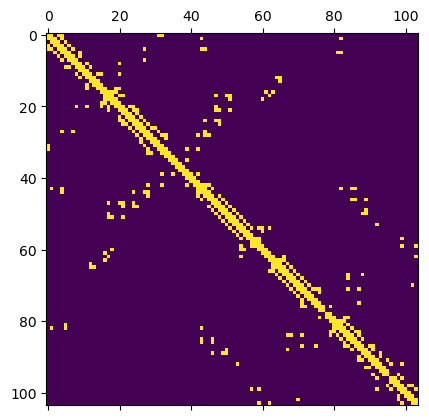

In [4]:
n, plddt, matrix, contact_map = get_nconts2(pdb_txt, 'A', 6, 0.6)
print('n_contas', n)
plt.matshow(contact_map)
#plt.xticks(())  # remove x tick marks
#plt.yticks(())  # remove y tick marks
plt.show()

In [5]:
chainA='A'
chainB='B' 
distance_cutoff=6.0
plddt_cutoff=0

# Get all C-beta atoms with specific pLDDT cutoff
cbeta_atom = []
for line in pdb_txt.splitlines():
        if line[:4] == 'ATOM' and line[13:15] == "CB":
            cbeta_atom.append(line)
cbeta_array = [['X' for j in range(8)] for i in range(len(cbeta_atom))]
for row in range(len(cbeta_atom)):
    cbeta_array[row]
    cbeta_array[row][0] = row					#Index
    cbeta_array[row][1] = (cbeta_atom[row][17:20]).strip()	#Residue Name
    cbeta_array[row][2] = (cbeta_atom[row][20:22]).strip()	#ChainID
    cbeta_array[row][3] = (cbeta_atom[row][22:26]).strip()	#Residue Number
    cbeta_array[row][4] = (cbeta_atom[row][30:38]).strip()	#xyz
    cbeta_array[row][5] = (cbeta_atom[row][38:46]).strip()	#xyz
    cbeta_array[row][6] = (cbeta_atom[row][46:54]).strip()	#xyz
    cbeta_array[row][7] = (cbeta_atom[row][61:66]).strip()	#pLDDT 

cb_data_A, cb_data_B, = [], []
for row in range(len(cbeta_array)):
    if (cbeta_array[row][2] == chainA and float(cbeta_array[row][7]) > plddt_cutoff):
        cb_data_A.append(cbeta_array[row])
    if (cbeta_array[row][2] == chainB and float(cbeta_array[row][7]) > plddt_cutoff):
        cb_data_B.append(cbeta_array[row])
if len(cb_data_A) == 0 or len(cb_data_B) == 0: 
    print(1, 1)
else:    
    Acoords = np.array([item[4:7] for item in cb_data_A], dtype="float32")
    Bcoords = np.array([item[4:7] for item in cb_data_B], dtype="float32")
    CA_pLDDT_A = np.array([item[7] for item in cb_data_A], dtype="float32").mean()
    distances_matrix = np.linalg.norm(Acoords[:, None] - Bcoords, axis=2)
    contact_map = distances_matrix.copy()
    contact_map[contact_map <= distance_cutoff] = 1
    contact_map[contact_map > distance_cutoff] = 0
    n_contacts = contact_map.sum()
    inteface_ndx = np.where(contact_map)
    print(n_contacts, round(CA_pLDDT_A * 0.01, 3))



14.0 0.891


In [25]:
np.unique(x[0])

array([0, 1, 2, 3], dtype=int64)